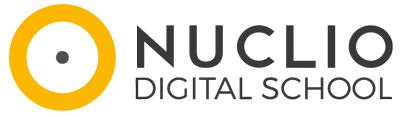

## **Proyecto Health Analytics para el estudio de la salud pública**

**DESCRIPCIÓN DEL PROYECTO**


Análisis en países desarrollados y subdesarrollados de la relación entre la esperanza de vida, las principales causas de muerte, el gasto en salud, el PIB per cápita, tasas de vacunación, niveles de pobreza, y las tasas de homicidios y suicidios en diferentes países. Este proyecto busca entender cómo los factores socioeconómicos y de salud pública influyen en la calidad y expectativa de vida a nivel global. Además, los resultados del análisis se complementarán con la implementación de un modelo simple que ayude a entender los factores de vida que impactan en la esperanza de vida de un país,  y diseñar un dashboard para la WHO con los principales resultados del análisis. 


### 1) Import libraries

In [168]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2) Paths & directories

In [169]:
data_folder = 'data/'

annual_number_of_deaths_by_cause_path = data_folder + 'annual_number_of_deaths_by_cause.csv'
death_rate_from_suicides_gho_path = data_folder + 'death_rate_from_suicides_gho.csv'
gdp_per_capita_penn_world_table_path = data_folder + 'gdp_per_capita_penn_world_table.csv'
global_vaccination_coverage_path = data_folder + 'global_vaccination_coverage.csv'
homicide_rate_unodc_path = data_folder + 'homicide_rate_unodc.csv'
life_expectancy_path = data_folder + 'life_expectancy.csv'
poverty_explorer_path = data_folder + 'poverty_explorer.csv'
public_healthcare_spending_share_gdp_path = data_folder + 'public_healthcare_spending_share_gdp.csv'


### 3) Quick data exploration 

#### 3.1 Dataset for deaths

In [170]:
# Dataset for deaths: Datos anuales sobre el número de muertes desglosadas por causa
print("Dataset for deaths ")
df_deaths = pd.read_csv(annual_number_of_deaths_by_cause_path)
print(f'Shape of the dataset for deaths: {df_deaths.shape}')

print(f'\nNumber of countries in the data: {df_deaths["Code"].nunique()}')
print(f'Number of years available in the data: {df_deaths["Year"].nunique()}')

display(df_deaths.head())


Dataset for deaths 
Shape of the dataset for deaths: (6840, 34)

Number of countries in the data: 205
Number of years available in the data: 30


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816


#### 3.2 Dataset for suicides

In [171]:
# Dataset for suicides: Tasa de suicidios
print("Dataset for suicides ")
df_suicides = pd.read_csv(death_rate_from_suicides_gho_path)
print(f'Shape of the dataset for deaths: {df_suicides.shape}')

print(f'\nNumber of countries in the data: {df_suicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_suicides["Year"].nunique()}')

display(df_suicides.head())

Dataset for suicides 
Shape of the dataset for deaths: (3880, 4)

Number of countries in the data: 184
Number of years available in the data: 20


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85
3,Afghanistan,AFG,2003,7.72
4,Afghanistan,AFG,2004,7.77


#### 3.3 Dataset for GDP_per_capita

In [172]:
# Dataset for GDP_per_capita: PIB per cápita, a partir de la base de datos Penn World Table
print("Dataset for GDP")
df_gdp = pd.read_csv(gdp_per_capita_penn_world_table_path)
print(f'Shape of the dataset for GDP: {df_gdp.shape}')

print(f'\nNumber of countries in the data: {df_gdp["Code"].nunique()}')
print(f'Number of years available in the data: {df_gdp["Year"].nunique()}')

display(df_gdp.head())

Dataset for GDP
Shape of the dataset for GDP: (10108, 4)

Number of countries in the data: 182
Number of years available in the data: 70


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730


#### 3.4 Dataset for vaccination

In [173]:
# Dataset for vaccination: global_vaccination_coverage
print("Dataset for vaccination")
df_vaccination = pd.read_csv(global_vaccination_coverage_path)
print(f'Shape of the dataset for vaccination: {df_vaccination.shape}')

print(f'\nNumber of countries in the data: {df_vaccination["Code"].nunique()}')
print(f'Number of years available in the data: {df_vaccination["Year"].nunique()}')

display(df_vaccination.head())


Dataset for vaccination
Shape of the dataset for vaccination: (7897, 14)

Number of countries in the data: 196
Number of years available in the data: 42


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


#### 3.5 Dataset for homicides

In [174]:
# Dataset for homicides: homicide_rate_unodc
print("Dataset for homicides")
df_homicides = pd.read_csv(homicide_rate_unodc_path)
print(f'Shape of the dataset for homicides: {df_homicides.shape}')

print(f'\nNumber of countries in the data: {df_homicides["Code"].nunique()}')
print(f'Number of years available in the data: {df_homicides["Year"].nunique()}')

display(df_homicides.head())

Dataset for homicides
Shape of the dataset for homicides: (4204, 4)

Number of countries in the data: 201
Number of years available in the data: 32


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262


#### 3.6 Dataset for life_expectancy

In [175]:
# Dataset for life_expectancy: life_expectancy
print("Dataset for life expectancies")
df_life_expec = pd.read_csv(life_expectancy_path)
print(f'Shape of the dataset for life expectancies: {df_life_expec.shape}')

#print(f'\nNumber of countries in the data: {df_life_expec["Code"].nunique()}')
#print(f'Number of years available in the data: {df_life_expec["Year"].nunique()}')

display(df_life_expec.head())

Dataset for life expectancies
Shape of the dataset for life expectancies: (20755, 4)


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


#### 3.7 Dataset for poverty

In [176]:
# Dataset for poverty: Datos sobre pobreza
print("Dataset for poverty")
df_poverty = pd.read_csv(poverty_explorer_path)
print(f'Shape of the dataset for poverty: {df_poverty.shape}')

print(f'\nNumber of countries in the data: {df_poverty["Country"].nunique()}')
print(f'Number of years available in the data: {df_poverty["Year"].nunique()}')


display(df_poverty.head())

Dataset for poverty
Shape of the dataset for poverty: (2602, 109)

Number of countries in the data: 192
Number of years available in the data: 60


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,1819,16944,281906,1516827,2395790,3126915,3164783,3166501,2.768821,7.548123,14.802514,87717,239127,468949,7.933157,6.972103,3.691232,13.164797,0.119104,0.270103,0.241293,3.863286,5.289347,6.378684,7.322042,8.379662,9.354903,10.823087,12.473869,14.899548,21.215572,4.687306,5.399629,6.228325,6.971433,8.039671,9.178580,10.682603,14.954244,17.344930,19.693201,0.414055,1.309217,2.915092,0.417050,0.604653,0.823818,36582.383,144588.90,386328.72,3.924362,38.960340,61.430424,18.363249,73.68916,18.084910,80.22638,28.927036,0.002253,29.463327,60.633118,0.098215,73.61356,1.609277,80.187584,13.850017,0.039244,3.896034,12.286085,0.394810,22.106749,0.660099,32.090553,1.981502,71.384155,9334079.0,38417544.0,6689.6580,69963064.0,186085.92,101614760.0,3005595.8,3.064805,4.196122,5.060310,5.808691,6.647718,7.421392,8.586125,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,1415,33337,347459,1589301,2340279,2945105,3018917,3043749,3.212283,8.406373,16.020554,98007,256479,488789,8.108229,6.688141,3.501889,13.990763,0.164812,0.317390,0.268982,3.494002,4.859444,5.842059,6.738204,7.653102,8.839459,10.228584,11.984428,14.925079,25.435638,4.370816,5.093828,5.858262,6.687111,7.662466,8.913951,10.652152,17.543550,18.595226,20.580732,0.563548,1.563182,3.297149,0.469335,0.621838,0.825881,45998.117,159488.27,403681.56,43.873215,41.387882,63.137640,17.337124,74.09592,19.966413,80.05450,31.078033,0.020348,31.

#### 3.8 Dataset for public healthcare spending

In [177]:
# Dataset for public healthcare spending: Porcentaje del PIB destinado al gasto en sanidad pública
print("Dataset for public healthcare spending")
df_public_health_spend = pd.read_csv(public_healthcare_spending_share_gdp_path)
print(f'Shape of the dataset for poverty: {df_public_health_spend.shape}')

print(f'\nNumber of countries in the data: {df_public_health_spend["Code"].nunique()}')
print(f'Number of years available in the data: {df_public_health_spend["Year"].nunique()}')


display(df_public_health_spend.head())

Dataset for public healthcare spending
Shape of the dataset for poverty: (4014, 4)

Number of countries in the data: 191
Number of years available in the data: 20


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840


### 4) Funciones

In [178]:
def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        print("Calculamos cuántas filas y columnas hay en el conjunto de datos")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("Mostramos las primeras dos filas del conjunto de datos")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("Calculamos cuántas filas y columnas hay en el conjunto de datos")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("Mostramos las primeras cinco filas del conjunto de datos")
        display(df.head())
        print('\n########################################################################################')

        print("Estas son las últimas cinco filas del conjunto de datos:")
        display(df.tail())
        print('\n########################################################################################')

        print("Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("Identificamos las columnas del conjunto de datos")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("Identificamos el tipo de datos de cada columna")
        print(df.dtypes)
        print('\n########################################################################################')

        print("Mostramos el total de columnas que hay de cada tipo de datos")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("Obtenemos información más completa sobre la estructura y el contenido del DataFrame")
        print(df.info())
        print('\n########################################################################################')

        print("Mostramos valores únicos tiene cada columna")
        print(df.nunique())
        print('\n########################################################################################')

        print("Estas son las estadísticas descriptivas básicas de todas las columnas:")
        display(df.describe(include = 'all').fillna(''))
        print('\n########################################################################################')

        print("Observamos los valores nulos en el conjunto de datos")
        print(df.isnull().sum().sort_values(ascending = False))
        print('\n########################################################################################')

        print("Calculamos el porcentaje de valores nulos en cada columna")
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))
        print('\n########################################################################################')

In [179]:
def renombrar_columnas(df, mapeo_columnas):
    df = df.rename(columns=mapeo_columnas)
    return df

## 5) Analisis Exploratorio de datos

#### 5.1 DF DEATHS

In [180]:
exploracion_inicial(df_deaths)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 6,840 filas y 34 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
6835,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,1355,29162,104,11214,16649,12974,9278,48,2235,16,5102,37,11161,13,3176,2108,381,2990,2373,2751,1956,4202,632,146
6836,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,1338,27141,110,10998,16937,13024,9065,49,2296,31,5002,37,11465,6,3259,2160,393,3027,2436,2788,1962,4264,648,146
6837,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,1312,24846,115,10762,17187,12961,8901,50,2338,251,4948,37,11744,5,3313,2196,398,2962,2473,2818,2007,4342,654,144
6838,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,1294,22106,121,10545,17460,12860,8697,51,2372,0,4745,37,12038,9,3381,2240,400,2890,2509,2849,2030,4377,657,139
6839,Zimbabwe,ZWE,2019,1450,812,232,2884,2068,827,1434,1294,20722,127,10465,17810,12897,8609,53,2403,660,4635,37,12353,11,3460,2292,405,2855,2554,2891,2065,4437,662,136



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
2642,Iceland,ISL,1992,3,68,18,1,0,4,3,0,3,6,4,768,104,12,5,38,0,1,1,456,0,17,13,1,1,27,73,13,49,2,0
6614,World,OWID_WRL,2004,363658,909696,227822,394175,961129,338599,441673,265466,1844490,81873,1559197,14753751,2698805,2649140,180550,819584,242938,2167428,67154,7508315,70562,1019233,923527,91491,345736,1259242,3464172,1267253,2189105,123748,127996
1143,China,CHN,1993,33396,100822,34129,35265,1327,142119,37525,12866,4830,34848,152896,2519098,489064,266041,9287,213364,1573,71456,10139,1559122,6,74000,100190,20976,33447,227370,1364268,169199,320315,16377,22477
6787,Zambia,ZMB,1997,3733,325,108,3793,9149,436,699,1082,50296,20,10665,9848,13159,9288,72,812,0,14087,81,5572,1,1529,1196,297,3659,1716,1823,2944,4389,304,316
5704,Sudan,SDN,1994,2097,1465,425,3872,4320,2770,235,3076,791,129,2662,57194,16844,36535,76,1415,8,24696,70,9342,827,1243,2869,1020,3768,7195,6940,3401,5139,1940,3445



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Deaths - Meningitis - Sex: Both - Age: All Ages (Number)
	 - Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)
	 - Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
	 - Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)
	 - Deaths - Malaria - Sex: Both - Age: All Ages (Number)
	 - Deaths - Drowning - Sex: Both - Age: All Ages (Number)
	 - Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)
	 - Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)
	 - Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)
	 - Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)
	 - Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)
	 - Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)
	 - Deaths -

,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number),Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Self-harm - Sex: Both - Age: All Ages (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number),Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number),Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
count,6840,6150,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0,6840.0
unique,228,205,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
top,Afghanistan,AFG,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,30,30,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mean,,,2004.5,8213.149561,27363.188158,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,28141.249415,2449.07076,37153.226608,391007.961404,69343.833187,61315.166813,4247.575,20775.57076,1178.546345,53212.579386,1535.191813,206852.320614,2439.892544,27143.007018,25068.928801,2145.455848,9531.528801,30634.95614,91303.897661,31898.919006,56525.512135,3006.043275,3112.06652
std,,,8.656074,34982.933895,111314.606169,25767.447063,48289.6871,97346.78057,35879.40601,40888.793762,26355.21037,139197.345227,10384.17195,159572.076404,1508195.406995,260451.367923,253261.152334,17271.834644,81125.862901,11508.672592,241001.995279,6525.996581,813454.784177,17740.186931,103375.178904,96008.39114,8433.507625,41689.675155,116699.865828,377201.308879,119438.677613,210988.351746,11211.885249,14440.219516
min,,,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,,,1997.0,19.0,128.75,37.0,11.0,0.0,39.0,48.0,6.0,14.0,5.0,43.0,2888.25,459.0,148.0,12.0,128.0,0.0,28.0,3.0,1167.75,0.0,286.0,214.0,8.0,6.0,207.75,368.5,204.75,400.0,21.0,2.0
50%,,,2004.5,150.5,845.5,209.0,159.0,0.0,253.0,342.0,70.5,187.0,31.0,550.0,14925.0,3073.5,1362.0,99.0,642.5,0.0,478.0,33.0,7008.5,1.0,1324.0,1080.0,72.0,120.0,1239.5,2104.0,1541.0,2778.5,152.0,21.5
75%,,,2012.0,1622.25,4251.0,984.0,2204.0,1017.25,1014.25,1391.25,1244.5,3836.5,206.0,5256.0,67475.5,16650.75,12319.5,470.0,2792.0,25.0,7587.25,141.0,30678.25,77.0,4743.75,4497.5,371.0,212


########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                                                        690
Entity                                                                                        0
Year                                                                                          0
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                      0
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)         0
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)                             0
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)                        0
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                         0
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                   

##### 5.1.1 Nulos: identificación y tratamiento

In [181]:
# Comprobamo a que paises corresponden los nulos de la columna Code
df_deaths.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                            0
African Region (WHO)                  30
Albania                                0
Algeria                                0
American Samoa                         0
Andorra                                0
Angola                                 0
Antigua and Barbuda                    0
Argentina                              0
Armenia                                0
Australia                              0
Austria                                0
Azerbaijan                             0
Bahamas                                0
Bahrain                                0
Bangladesh                             0
Barbados                               0
Belarus                                0
Belgium                                0
Belize                                 0
Benin                                  0
Bermuda                                0
Bhutan                                 0
Bolivia                                0
Bosnia an

Tras verificar a qué paises pertenecen los códigos nulos, vemos que pertenecen a grupos regionales, económicos o políticos.

La lista de los nulos en "Code" es: 

        African Region (WHO)
        East Asia & Pacific (WB) 
        Eastern Mediterranean Region (WHO)
        Europe & Central Asia (WB)      
        European Region (WHO) 
        G20
        Latin America & Caribbean (WB)
        Middle East & North Africa (WB)  
        North America (WB) 
        Northern Ireland 
        OECD Countries 
        Region of the Americas (WHO) 
        Scotland
        South Asia (WB) 
        South-East Asia Region (WHO)
        Sub-Saharan Africa (WB)
        Western Pacific Region (WHO)  
        World Bank High Income
        World Bank Low Income
        World Bank Lower Middle Income
        World Bank Upper Middle Income

Estos pueden ser agrupaciones o categorías supra-nacionales usadas por organizaciones internacionales como:

* Organización Mundial de la Salud (WHO).
* Banco Mundial (WB).
* Organización para la Cooperación y el Desarrollo Económico (OECD).
* G20 (Grupo de los 20 principales economías del mundo).
* Escocia/north irland: forma parte de Reino Unido, ya que no se trata de un país soberano independiente sino de nación constitutiva 

Así que hemos consensuado de que en caso de trabajar con estos, lo haremos directamente con el nombre que tienen en la columna "Entity". 

+++ Hemos decidido fijar el foco del estudio en un análisis país por país, por lo tanto, dejamos de lado estas regiones puesto que en ella se cuentan de nuevo.
Aun que a priori, las vayamos a dejar fuera de nuesto análisis, lo que haremos es cread dos DF: 

* df_deaths_paises: en este dejaremos solo los paises
* df_deaths_regiones: este nos servirá para almacenar dichas regiones sin los paises

In [182]:
# Creamos el DataFrame para almacenar los países
df_deaths_paises = df_deaths[df_deaths['Code'].notnull()]

In [183]:
# Comprobamos que no haya ningun nulo en la columna 'Code'
df_deaths_paises['Code'].isnull().sum()

np.int64(0)

In [184]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_deaths_regiones = df_deaths[df_deaths['Code'].isnull()]

In [185]:
# Comprobamos que hay el mismo numero de nulos que en el DF original (df_deaths)
df_deaths_regiones['Code'].isnull().sum()

np.int64(690)

In [186]:
# Contabilizamos las filas de los DataFrames para comprobar que no perdemos datos
len(df_deaths) == (len(df_deaths_paises) + len(df_deaths_regiones))

True

##### 5.1.2 Normalización del nombre de las columnas

In [187]:
# Creamos un diccionario con los nombres antiguos como "key" y los nuevos como "values"
mapeo_deaths = {
    "Entity": "entidad",
    "Code": "codigo",
    "Year": "año",
    "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)": "meningitis",
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)": "alzheimer",
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)": "parkinson",
    "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)": "deficiencias_nutricionales",
    "Deaths - Malaria - Sex: Both - Age: All Ages (Number)": "malaria",
    "Deaths - Drowning - Sex: Both - Age: All Ages (Number)": "ahogamiento",
    "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)": "violencia_interpersonal",
    "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)": "transtornos_maternos",
    "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)": "VIH_SIDA",
    "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)": "transtornos_drogas",
    "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)": "tuberculosis",
    "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)": "enf_cardiovasculares",
    "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)": "infecciones_respiratorias_leves",
    "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)": "transtornos_neonatales",
    "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)": "alcohol",
    "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)": "autolesiones",
    "Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)": "fuerzas_naturaleza",
    "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)": "enfermedades_diarreicas",
    "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)": "temperatura_ambiental",
    "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)": "muertes",
    "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)": "conflictos-y_terrorismo",
    "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)": "diabetes_mellitus",
    "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)": "enfermedad_renal_cronica",
    "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)": "envenenamientos",
    "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)": "desnutricion_energético_proteica",
    "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)": "lesiones_accidentes_trafico",
    "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)": "enfermedades_respiratorias_crónicas",
    "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)": "cirrosis_enferemedades_higado",
    "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)": "enf_digestivas",
    "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)": "incendios_calor_sustancias_calientes",
    "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)": "hepatitis_aguda"
}

In [188]:
# Llamamos a la función de cambio de nombre y le pasamos el DataFrame a actualizar y el diccionario que debe tomar en cuenta
df_deaths_paises = renombrar_columnas(df_deaths_paises, mapeo_deaths) 
df_deaths_regiones = renombrar_columnas(df_deaths_regiones, mapeo_deaths) 

In [189]:
# Comrpobamos que el cambio se haya realizado correctamente
df_deaths_paises.columns

Index(['entidad', 'codigo', 'año', 'meningitis', 'alzheimer', 'parkinson',
       'deficiencias_nutricionales', 'malaria', 'ahogamiento',
       'violencia_interpersonal', 'transtornos_maternos', 'VIH_SIDA',
       'transtornos_drogas', 'tuberculosis', 'enf_cardiovasculares',
       'infecciones_respiratorias_leves', 'transtornos_neonatales', 'alcohol',
       'autolesiones', 'fuerzas_naturaleza', 'enfermedades_diarreicas',
       'temperatura_ambiental', 'muertes', 'conflictos-y_terrorismo',
       'diabetes_mellitus', 'enfermedad_renal_cronica', 'envenenamientos',
       'desnutricion_energético_proteica', 'lesiones_accidentes_trafico',
       'enfermedades_respiratorias_crónicas', 'cirrosis_enferemedades_higado',
       'enf_digestivas', 'incendios_calor_sustancias_calientes',
       'hepatitis_aguda'],
      dtype='object')

##### 5.1.3 Analisis Exploratorio DF PAISES

In [190]:
# Realizamos la exploración de datos del DataFrame "df_deaths_paises"
exploracion_inicial(df_deaths_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 6,150 filas y 34 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
6835,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,1355,29162,104,11214,16649,12974,9278,48,2235,16,5102,37,11161,13,3176,2108,381,2990,2373,2751,1956,4202,632,146
6836,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,1338,27141,110,10998,16937,13024,9065,49,2296,31,5002,37,11465,6,3259,2160,393,3027,2436,2788,1962,4264,648,146
6837,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,1312,24846,115,10762,17187,12961,8901,50,2338,251,4948,37,11744,5,3313,2196,398,2962,2473,2818,2007,4342,654,144
6838,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,1294,22106,121,10545,17460,12860,8697,51,2372,0,4745,37,12038,9,3381,2240,400,2890,2509,2849,2030,4377,657,139
6839,Zimbabwe,ZWE,2019,1450,812,232,2884,2068,827,1434,1294,20722,127,10465,17810,12897,8609,53,2403,660,4635,37,12353,11,3460,2292,405,2855,2554,2891,2065,4437,662,136



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
6838,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,1294,22106,121,10545,17460,12860,8697,51,2372,0,4745,37,12038,9,3381,2240,400,2890,2509,2849,2030,4377,657,139
1237,Congo,COG,1997,453,123,46,500,2714,149,192,427,7578,14,2844,4906,2408,2149,37,367,0,3840,22,2002,10447,709,463,69,469,1327,900,762,1244,85,50
502,Barbados,BRB,2012,3,86,22,6,0,10,32,2,28,1,2,728,139,23,7,13,0,4,0,660,0,245,99,0,4,28,50,37,91,4,0
5836,Syria,SYR,2006,336,1011,266,122,0,210,393,139,24,130,96,32950,2105,2741,56,364,6,206,25,6364,1003,1262,1994,98,93,2156,2548,1499,1982,207,16
925,Burundi,BDI,2015,1255,419,103,2371,6349,347,94,1236,4182,13,8131,9547,6610,8746,75,702,37,9616,82,4624,666,1287,924,249,2305,1782,2169,1676,3129,267,195



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - meningitis
	 - alzheimer
	 - parkinson
	 - deficiencias_nutricionales
	 - malaria
	 - ahogamiento
	 - violencia_interpersonal
	 - transtornos_maternos
	 - VIH_SIDA
	 - transtornos_drogas
	 - tuberculosis
	 - enf_cardiovasculares
	 - infecciones_respiratorias_leves
	 - transtornos_neonatales
	 - alcohol
	 - autolesiones
	 - fuerzas_naturaleza
	 - enfermedades_diarreicas
	 - temperatura_ambiental
	 - muertes
	 - conflictos-y_terrorismo
	 - diabetes_mellitus
	 - enfermedad_renal_cronica
	 - envenenamientos
	 - desnutricion_energético_proteica
	 - lesiones_accidentes_trafico
	 - enfermedades_respiratorias_crónicas
	 - cirrosis_enferemedades_higado
	 - enf_digestivas
	 - incendios_calor_sustancias_calientes
	 - hepatitis_aguda

########################################################################################
Iden

,entidad,codigo,año,meningitis,alzheimer,parkinson,deficiencias_nutricionales,malaria,ahogamiento,violencia_interpersonal,transtornos_maternos,VIH_SIDA,transtornos_drogas,tuberculosis,enf_cardiovasculares,infecciones_respiratorias_leves,transtornos_neonatales,alcohol,autolesiones,fuerzas_naturaleza,enfermedades_diarreicas,temperatura_ambiental,muertes,conflictos-y_terrorismo,diabetes_mellitus,enfermedad_renal_cronica,envenenamientos,desnutricion_energético_proteica,lesiones_accidentes_trafico,enfermedades_respiratorias_crónicas,cirrosis_enferemedades_higado,enf_digestivas,incendios_calor_sustancias_calientes,hepatitis_aguda
count,6150,6150,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0,6150.0
unique,205,205,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
top,Afghanistan,AFG,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,30,30,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mean,,,2004.5,3423.639675,9683.673496,2335.548943,4486.367154,8242.927154,3351.127805,4151.457236,2513.731057,11831.072033,863.911707,14913.983089,145645.79626,27250.711707,25001.596911,1567.466992,7713.353333,486.102276,21544.736748,581.808618,74737.344715,1071.625528,10232.736748,9405.269268,846.067642,3913.897724,11807.082276,34024.413171,12191.752846,21351.725041,1172.139675,1231.042764
std,,,8.656145,25578.692671,74540.530288,17821.571447,35677.646036,61813.290367,25942.498643,30357.542437,19020.454835,91564.00099,6878.515628,114046.254367,1082683.279332,200526.756338,187616.47195,11738.165596,57874.525122,7662.896173,169123.979795,4509.865472,561681.574665,12181.872147,76773.396806,71089.056676,6350.366404,30949.767359,87385.076263,263984.687769,89573.954204,156857.1838,8613.047956,9890.803814
min,,,1990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,,,1997.0,16.0,91.25,27.0,9.0,0.0,34.25,41.0,5.0,11.0,3.0,35.25,2065.5,351.0,132.25,9.0,96.25,0.0,21.0,2.0,826.0,0.0,239.0,148.25,6.0,5.0,176.25,292.0,155.0,288.0,17.0,2.0
50%,,,2004.5,112.0,674.5,166.0,121.0,0.0,179.0,273.0,55.0,139.0,21.0,424.0,11902.5,2146.0,931.0,81.0,537.0,0.0,305.0,21.0,5657.5,0.0,1099.0,837.5,54.0,93.0,984.0,1713.0,1234.0,2205.0,127.0,15.0
75%,,,2012.0,886.75,2500.0,618.75,1201.75,426.75,707.0,885.75,750.75,1957.5,132.0,3024.5,43722.25,10374.0,7598.25,323.0,1909.5,12.0,4089.25,111.0,20554.25,24.0,3005.75,2989.25,262.0,1081.75,3534.25,5382.5,3614.0,6184.75,455.0,166.0



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                                 0
codigo                                  0
año                                     0
meningitis                              0
alzheimer                               0
parkinson                               0
deficiencias_nutricionales              0
malaria                                 0
ahogamiento                             0
violencia_interpersonal                 0
transtornos_maternos                    0
VIH_SIDA                                0
transtornos_drogas                      0
tuberculosis                            0
enf_cardiovasculares                    0
infecciones_respiratorias_leves         0
transtornos_neonatales                  0
alcohol                                 0
autolesiones                            0
fuerzas_naturaleza                      0
enfermedades_diar

#### 5.2 DF Suicides

In [191]:
exploracion_inicial(df_suicides)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 3,880 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85
3,Afghanistan,AFG,2003,7.72
4,Afghanistan,AFG,2004,7.77



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
3875,Zimbabwe,ZWE,2015,30.7352
3876,Zimbabwe,ZWE,2016,28.6973
3877,Zimbabwe,ZWE,2017,25.8514
3878,Zimbabwe,ZWE,2018,23.8676
3879,Zimbabwe,ZWE,2019,23.6286



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
3836,Yemen,YEM,2016,6.98
3601,United Arab Emirates,ARE,2001,7.89
1632,Indonesia,IDN,2012,2.76
1722,Italy,ITA,2002,5.41
3535,Turkey,TUR,2015,2.26



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Age-standardized suicide rate - Sex: both sexes

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                              object
Code                                                object
Year                                                 int64
Age-standardized suicide rate - Sex: both sexes    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<cl

,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes
count,3880,3680,3880.0,3880.0
unique,194,184,,
top,Afghanistan,AFG,,
freq,20,20,,
mean,,,2009.5,11.711984
std,,,5.767025,9.58546
min,,,2000.0,0.0
25%,,,2004.75,5.8075
50%,,,2009.5,9.9
75%,,,2014.25,14.60265



########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                               200
Entity                                               0
Year                                                 0
Age-standardized suicide rate - Sex: both sexes      0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                               5.15
Entity                                             0.00
Year                                               0.00
Age-standardized suicide rate - Sex: both sexes    0.00
dtype: float64

########################################################################################


##### 5.2.1 Nulos: identificación y tratamiento

In [192]:
# Identificamos a qué pais/región pertenecen los nulos
df_suicides.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                          0
Africa                              20
Albania                              0
Algeria                              0
Americas                            20
Angola                               0
Antigua and Barbuda                  0
Argentina                            0
Armenia                              0
Australia                            0
Austria                              0
Azerbaijan                           0
Bahamas                              0
Bahrain                              0
Bangladesh                           0
Barbados                             0
Belarus                              0
Belgium                              0
Belize                               0
Benin                                0
Bhutan                               0
Bolivia                              0
Bosnia and Herzegovina               0
Botswana                             0
Brazil                               0
Brunei            

Como hemos observado en el dataset "df_deaths" los nulos corresponden a grupos/agregaciones que usa la ONU para agrupar países de acuerdo a su ubicación continental o subcontinental. 

De modo que podemos afirmar lo siguiente: 

* No son paises individuales
* Duplican información puesto que paises que ya aparecen en nuestra tabla forman parte de esas regiones. 

Procedemos exactamente de la misma manera que en el primer dataset y procedemos a crear una tabla de regiones y otra de paises.

In [193]:
# Creamos el DataFrame para almacenar los países
df_suicides_paises = df_suicides[df_suicides['Code'].notnull()]

In [194]:
# Verificamos que no hay ningún nulo en la columna ['codigo']
df_suicides_paises['Code'].isnull().sum()

np.int64(0)

In [195]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_suicides_regiones = df_suicides[df_suicides['Code'].isnull()]

In [196]:
# Verificamos que tenemos los 200 nulos en la columna ['codigo']
df_suicides_regiones['Code'].isnull().sum()

np.int64(200)

##### 5.2.2 Normalización del nombre de las columnas

In [197]:
mapeo_suicides = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Age-standardized suicide rate - Sex: both sexes": "ratio_por_suicidios"
}

In [198]:
# Tratamos el renombre de las columnas con la funcion creada anteriormente
df_suicides_paises = renombrar_columnas(df_suicides_paises, mapeo_suicides)
df_suicides_regiones = renombrar_columnas(df_suicides_regiones, mapeo_suicides)

In [199]:
# Comprobamos el resultado del renombre
df_suicides_paises.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_suicidios'], dtype='object')

In [200]:
# Comprobamos el resultado del renombre
df_suicides_regiones.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_suicidios'], dtype='object')

##### 5.2.3 Análisis exploratorio de df_suicides_paises

In [201]:
exploracion_inicial(df_suicides_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 3,680 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,ratio_por_suicidios
0,Afghanistan,AFG,2000,7.71
1,Afghanistan,AFG,2001,7.89
2,Afghanistan,AFG,2002,7.85
3,Afghanistan,AFG,2003,7.72
4,Afghanistan,AFG,2004,7.77



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,ratio_por_suicidios
3875,Zimbabwe,ZWE,2015,30.7352
3876,Zimbabwe,ZWE,2016,28.6973
3877,Zimbabwe,ZWE,2017,25.8514
3878,Zimbabwe,ZWE,2018,23.8676
3879,Zimbabwe,ZWE,2019,23.6286



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,ratio_por_suicidios
2597,North Macedonia,MKD,2017,7.2300
2301,Moldova,MDA,2001,17.6774
2401,Myanmar,MMR,2001,4.8600
1588,Iceland,ISL,2008,13.3457
421,Bolivia,BOL,2001,8.0500



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - ratio_por_suicidios

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                 object
codigo                  object
año                      int64
ratio_por_suicidios    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 3680 entries, 0 to 3879
Data columns (total 4 columns):
 #   Column               Non-Null Count

,entidad,codigo,año,ratio_por_suicidios
count,3680,3680,3680.0,3680.0
unique,184,184,,
top,Afghanistan,AFG,,
freq,20,20,,
mean,,,2009.5,11.741173
std,,,5.767065,9.820774
min,,,2000.0,0.0
25%,,,2004.75,5.5875
50%,,,2009.5,9.765
75%,,,2014.25,14.8499



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                0
codigo                 0
año                    0
ratio_por_suicidios    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad                0.0
codigo                 0.0
año                    0.0
ratio_por_suicidios    0.0
dtype: float64

########################################################################################


#### 5.3 DF GDP_per_capita

In [202]:
exploracion_inicial(df_gdp)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 10,108 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
10103,Zimbabwe,ZWE,2015,2880.9058
10104,Zimbabwe,ZWE,2016,2919.6170
10105,Zimbabwe,ZWE,2017,3112.8750
10106,Zimbabwe,ZWE,2018,3007.2370
10107,Zimbabwe,ZWE,2019,2787.6590



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
4339,Hungary,HUN,2019,29236.400
8174,Seychelles,SYC,1977,16861.970
7771,Rwanda,RWA,1974,1095.663
10059,Zimbabwe,ZWE,1971,3048.605
1201,Botswana,BWA,2010,14527.120



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - GDP per capita (output, multiple price benchmarks)

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                 object
Code                                                   object
Year                                                    int64
GDP per capita (output, multiple price benchmarks)    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido de

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
count,10108,10108,10108.0,10108.0
unique,182,182,,
top,Australia,AUS,,
freq,70,70,,
mean,,,1989.576078,13121.751931
std,,,18.56453,17131.658623
min,,,1950.0,246.74171
25%,,,1975.0,2617.814225
50%,,,1991.0,6723.8973
75%,,,2005.0,16650.07



########################################################################################
Observamos los valores nulos en el conjunto de datos
Entity                                                0
Code                                                  0
Year                                                  0
GDP per capita (output, multiple price benchmarks)    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Entity                                                0.0
Code                                                  0.0
Year                                                  0.0
GDP per capita (output, multiple price benchmarks)    0.0
dtype: float64

########################################################################################


##### 5.3.1 Nulos: identificación y tratamiento

En este caso no se aprecian valores nulos, por lo tanto vamos a crear un DF auxiliar para no tratar los datos del DF original

In [203]:
df_gdp_aux = df_gdp

##### 5.3.2 Normalización del nombre de las columnas

In [204]:
mapeo_gdp = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"GDP per capita (output, multiple price benchmarks)": "gdp_per_capita"
}

In [205]:
df_gdp_aux = renombrar_columnas(df_gdp_aux, mapeo_gdp)

In [206]:
# Comprobamos la modificiacion de las columnas
df_gdp_aux.columns

Index(['entidad', 'codigo', 'año', 'gdp_per_capita'], dtype='object')

##### 5.3.3 Análisis exploratorio de df_gdp_aux

In [207]:
exploracion_inicial(df_gdp_aux)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 10,108 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,gdp_per_capita
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,gdp_per_capita
10103,Zimbabwe,ZWE,2015,2880.9058
10104,Zimbabwe,ZWE,2016,2919.6170
10105,Zimbabwe,ZWE,2017,3112.8750
10106,Zimbabwe,ZWE,2018,3007.2370
10107,Zimbabwe,ZWE,2019,2787.6590



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,gdp_per_capita
3332,Finland,FIN,1952,7420.9785
2147,Colombia,COL,2009,10974.3970
6845,Niger,NER,1970,2124.3464
7873,Saint Lucia,LCA,1976,6728.3960
2683,Denmark,DNK,2010,48860.0550



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - gdp_per_capita

########################################################################################
Identificamos el tipo de datos de cada columna
entidad            object
codigo             object
año                 int64
gdp_per_capita    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------  

,entidad,codigo,año,gdp_per_capita
count,10108,10108,10108.0,10108.0
unique,182,182,,
top,Australia,AUS,,
freq,70,70,,
mean,,,1989.576078,13121.751931
std,,,18.56453,17131.658623
min,,,1950.0,246.74171
25%,,,1975.0,2617.814225
50%,,,1991.0,6723.8973
75%,,,2005.0,16650.07



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad           0
codigo            0
año               0
gdp_per_capita    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad           0.0
codigo            0.0
año               0.0
gdp_per_capita    0.0
dtype: float64

########################################################################################


#### 5.4 DF Vaccination

In [208]:
exploracion_inicial(df_vaccination)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 7,897 filas y 14 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
7892,Zimbabwe,ZWE,2017,95.0,89.0,89.0,NaN,90.0,89.0,89.0,90.0,91.0,NaN,89.0
7893,Zimbabwe,ZWE,2018,95.0,89.0,89.0,NaN,88.0,89.0,89.0,88.0,90.0,NaN,89.0
7894,Zimbabwe,ZWE,2019,95.0,90.0,90.0,65.0,85.0,90.0,90.0,85.0,92.0,NaN,90.0
7895,Zimbabwe,ZWE,2020,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0
7896,Zimbabwe,ZWE,2021,88.0,86.0,86.0,86.0,85.0,86.0,86.0,85.0,88.0,NaN,86.0



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
5473,Papua New Guinea,PNG,2020,52.0,39.0,39.0,39.0,47.0,39.0,41.0,47.0,NaN,NaN,39.0
4448,Mauritius,MUS,2021,95.0,92.0,92.0,93.0,77.0,94.0,93.0,77.0,86.0,NaN,92.0
5543,Peru,PER,2006,96.0,94.0,94.0,NaN,93.0,NaN,94.0,93.0,NaN,91.0,94.0
5481,Paraguay,PRY,1986,51.0,NaN,NaN,NaN,46.0,NaN,90.0,NaN,NaN,NaN,53.0
5745,Region of the Americas (WHO),NaN,1998,95.0,31.0,33.0,NaN,91.0,NaN,87.0,61.0,NaN,22.0,88.0



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - BCG (% of one-year-olds immunized)
	 - HepB3 (% of one-year-olds immunized)
	 - Hib3 (% of one-year-olds immunized)
	 - IPV1 (% of one-year-olds immunized)
	 - MCV1 (% of one-year-olds immunized)
	 - PCV3 (% of one-year-olds immunized)
	 - Pol3 (% of one-year-olds immunized)
	 - RCV1 (% of one-year-olds immunized)
	 - RotaC (% of one-year-olds immunized)
	 - YFV (% of one-year-olds immunized)
	 - DTP3 (% of one-year-olds immunized)

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                   object
Code                                     object
Year                                      int64
BCG (% of one-year-olds immunized)      float64
HepB3 (% of one-year-olds immunized)    float64
Hib3 (% of one-

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
count,7897,7645,7897.0,6497.0,4436.0,3629.0,1297.0,7728.0,1497.0,7855.0,4198.0,1039.0,824.0,7854.0
unique,202,196,,,,,,,,,,,,
top,Afghanistan,AFG,,,,,,,,,,,,
freq,42,42,,,,,,,,,,,,
mean,,,2001.586299,84.010312,82.326195,83.14825,82.730146,78.443323,77.035404,80.095226,85.676513,69.495669,54.274272,79.543672
std,,,11.76932,20.009474,21.924247,22.032865,22.68534,21.895398,24.897693,22.11455,21.010275,28.137731,28.903746,22.220256
min,,,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,,,1992.0,79.0,77.0,80.0,76.0,68.0,69.0,72.0,85.0,58.0,35.0,71.0
50%,,,2002.0,92.0,91.0,92.0,94.0,87.0,87.0,89.0,93.0,80.0,60.0,88.0
75%,,,2012.0,98.0,96.0,96.0,98.0,95.0,94.0,96.0,97.0,90.0,79.25,96.0



########################################################################################
Observamos los valores nulos en el conjunto de datos
YFV (% of one-year-olds immunized)      7073
RotaC (% of one-year-olds immunized)    6858
IPV1 (% of one-year-olds immunized)     6600
PCV3 (% of one-year-olds immunized)     6400
Hib3 (% of one-year-olds immunized)     4268
RCV1 (% of one-year-olds immunized)     3699
HepB3 (% of one-year-olds immunized)    3461
BCG (% of one-year-olds immunized)      1400
Code                                     252
MCV1 (% of one-year-olds immunized)      169
DTP3 (% of one-year-olds immunized)       43
Pol3 (% of one-year-olds immunized)       42
Year                                       0
Entity                                     0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
YFV (% of one-year-olds immunized)      89.57
RotaC (% of one-year

In [209]:
df_vaccination.head(75)

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0
5,Afghanistan,AFG,1987,27.0,NaN,NaN,NaN,31.0,NaN,25.0,NaN,NaN,NaN,25.0
6,Afghanistan,AFG,1988,40.0,NaN,NaN,NaN,34.0,NaN,35.0,NaN,NaN,NaN,35.0
7,Afghanistan,AFG,1989,38.0,NaN,NaN,NaN,22.0,NaN,33.0,NaN,NaN,NaN,33.0
8,Afghanistan,AFG,1990,30.0,NaN,NaN,NaN,20.0,NaN,25.0,NaN,NaN,NaN,25.0
9,Afghanistan,AFG,1991,21.0,NaN,NaN,NaN,19.0,NaN,23.0,NaN,NaN,NaN,23.0


##### 5.4.1 Nulos: identificación y tratamiento

In [210]:
df_vaccination.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                            0
African Region (WHO)                  42
Albania                                0
Algeria                                0
Andorra                                0
Angola                                 0
Antigua and Barbuda                    0
Argentina                              0
Armenia                                0
Australia                              0
Austria                                0
Azerbaijan                             0
Bahamas                                0
Bahrain                                0
Bangladesh                             0
Barbados                               0
Belarus                                0
Belgium                                0
Belize                                 0
Benin                                  0
Bhutan                                 0
Bolivia                                0
Bosnia and Herzegovina                 0
Botswana                               0
Brazil   

In [211]:
df_vaccination_paises = df_vaccination[df_vaccination['Code'].notnull()]
df_vaccination_regiones = df_vaccination[df_vaccination['Code'].isnull()]

In [212]:
df_vaccination_paises['Code'].isnull().sum()

np.int64(0)

In [213]:
df_vaccination_regiones['Code'].isnull().sum()

np.int64(252)

##### 5.4.2 Normalización del nombre de las columnas

In [214]:
mapeo_vacunacion = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
    "BCG (% of one-year-olds immunized)": "tuberculosis", 
	"HepB3 (% of one-year-olds immunized)": "hepatitis_B",
	"Hib3 (% of one-year-olds immunized)": "haemophilus_influenzae_tipo_b",
	"IPV1 (% of one-year-olds immunized)": "polio_primera_dosis",
	"MCV1 (% of one-year-olds immunized)": "sarampion_primera_dosis",
	"PCV3 (% of one-year-olds immunized)": "vacuna_antineumocócica",
	"Pol3 (% of one-year-olds immunized)": "polio",
	"RCV1 (% of one-year-olds immunized)": "rubéola",
	"RotaC (% of one-year-olds immunized)": "rotavirus",
	"YFV (% of one-year-olds immunized)": "fiebre_amarilla",
	"DTP3 (% of one-year-olds immunized)": "DTP3",
}

In [215]:
df_vaccination_paises = renombrar_columnas(df_vaccination_paises, mapeo_vacunacion)
df_vaccination_regiones = renombrar_columnas(df_vaccination_regiones, mapeo_vacunacion)

In [216]:
df_vaccination_paises.head(0)

,entidad,codigo,año,tuberculosis,hepatitis_B,haemophilus_influenzae_tipo_b,polio_primera_dosis,sarampion_primera_dosis,vacuna_antineumocócica,polio,rubéola,rotavirus,fiebre_amarilla,DTP3


In [217]:
df_vaccination_regiones.head(0)

,entidad,codigo,año,tuberculosis,hepatitis_B,haemophilus_influenzae_tipo_b,polio_primera_dosis,sarampion_primera_dosis,vacuna_antineumocócica,polio,rubéola,rotavirus,fiebre_amarilla,DTP3


##### 5.4.3 Análisis exploratorio de df_vaccination_paises

In [218]:
df_vaccination_paises.groupby(['entidad'])['tuberculosis'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                          2
Albania                              0
Algeria                              4
Andorra                             25
Angola                               0
Antigua and Barbuda                 42
Argentina                            0
Armenia                              0
Australia                           42
Austria                             32
Azerbaijan                           0
Bahamas                             42
Bahrain                             42
Bangladesh                           0
Barbados                            42
Belarus                              0
Belgium                             42
Belize                               0
Benin                                0
Bhutan                               0
Bolivia                              0
Bosnia and Herzegovina               0
Botswana                             0
Brazil                               0
Brunei                               0
Bulgaria         

In [219]:
df_vaccination_paises.groupby(['entidad'])['hepatitis_B'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         27
Albania                             14
Algeria                             23
Andorra                              0
Angola                              24
Antigua and Barbuda                 21
Argentina                           22
Armenia                              8
Australia                           21
Austria                             20
Azerbaijan                          10
Bahamas                             21
Bahrain                             12
Bangladesh                          22
Barbados                            21
Belarus                              8
Belgium                             17
Belize                              20
Benin                               17
Bhutan                              16
Bolivia                             20
Bosnia and Herzegovina              12
Botswana                            15
Brazil                              14
Brunei                              10
Bulgaria         

In [220]:
df_vaccination_paises.groupby(['entidad'])['haemophilus_influenzae_tipo_b'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         29
Albania                             29
Algeria                             27
Andorra                              1
Angola                              24
Antigua and Barbuda                 21
Argentina                           18
Armenia                             18
Australia                           17
Austria                             19
Azerbaijan                          19
Bahamas                             19
Bahrain                             18
Bangladesh                          28
Barbados                            21
Belarus                             16
Belgium                             13
Belize                              21
Benin                               20
Bhutan                              32
Bolivia                             20
Bosnia and Herzegovina              12
Botswana                            31
Brazil                              20
Brunei                              22
Bulgaria         

In [221]:
df_vaccination_paises.groupby(['entidad'])['polio_primera_dosis'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         36
Albania                             35
Algeria                             34
Andorra                             18
Angola                              35
Antigua and Barbuda                 35
Argentina                           36
Armenia                             24
Australia                           35
Austria                             36
Azerbaijan                          24
Bahamas                             35
Bahrain                             35
Bangladesh                          34
Barbados                            36
Belarus                             23
Belgium                             35
Belize                              35
Benin                               30
Bhutan                              35
Bolivia                             36
Bosnia and Herzegovina              23
Botswana                            35
Brazil                              35
Brunei                              35
Bulgaria         

In [222]:
df_vaccination_paises.groupby(['entidad'])['sarampion_primera_dosis'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                          1
Albania                              0
Algeria                              4
Andorra                              0
Angola                               0
Antigua and Barbuda                  3
Argentina                            0
Armenia                              0
Australia                            3
Austria                              1
Azerbaijan                           0
Bahamas                              2
Bahrain                              0
Bangladesh                           1
Barbados                             0
Belarus                              0
Belgium                              1
Belize                               0
Benin                                0
Bhutan                               0
Bolivia                              0
Bosnia and Herzegovina               0
Botswana                             0
Brazil                               0
Brunei                               0
Bulgaria         

In [223]:
df_vaccination_paises.groupby(['entidad'])['vacuna_antineumocócica'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         34
Albania                             31
Algeria                             35
Andorra                             17
Angola                              30
Antigua and Barbuda                 42
Argentina                           32
Armenia                             23
Australia                           28
Austria                             42
Azerbaijan                          22
Bahamas                             29
Bahrain                             28
Bangladesh                          34
Barbados                            29
Belarus                             30
Belgium                             32
Belize                              42
Benin                               26
Bhutan                              39
Bolivia                             34
Bosnia and Herzegovina              30
Botswana                            32
Brazil                              30
Brunei                              42
Bulgaria         

In [224]:
df_vaccination_paises.groupby(['entidad'])['polio'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         1
Albania                             0
Algeria                             0
Andorra                             0
Angola                              2
Antigua and Barbuda                 0
Argentina                           0
Armenia                             0
Australia                           0
Austria                             0
Azerbaijan                          0
Bahamas                             0
Bahrain                             0
Bangladesh                          0
Barbados                            0
Belarus                             0
Belgium                             0
Belize                              0
Benin                               0
Bhutan                              0
Bolivia                             0
Bosnia and Herzegovina              0
Botswana                            0
Brazil                              0
Brunei                              0
Bulgaria                            0
Burk

In [225]:
df_vaccination_paises.groupby(['entidad'])['rubéola'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         42
Albania                             21
Algeria                             36
Andorra                              0
Angola                              35
Antigua and Barbuda                  8
Argentina                           17
Armenia                             10
Australia                            3
Austria                              1
Azerbaijan                          11
Bahamas                             11
Bahrain                              0
Bangladesh                          31
Barbados                             2
Belarus                              4
Belgium                              5
Belize                              16
Benin                               34
Bhutan                              26
Bolivia                             20
Bosnia and Herzegovina               0
Botswana                            36
Brazil                              20
Brunei                               4
Bulgaria         

In [226]:
df_vaccination_paises.groupby(['entidad'])['rotavirus'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         38
Albania                             40
Algeria                             41
Andorra                             25
Angola                              31
Antigua and Barbuda                 42
Argentina                           35
Armenia                             21
Australia                           28
Austria                             28
Azerbaijan                          30
Bahamas                             36
Bahrain                             28
Bangladesh                          41
Barbados                            42
Belarus                             30
Belgium                             32
Belize                              42
Benin                               35
Bhutan                              42
Bolivia                             28
Bosnia and Herzegovina              30
Botswana                            32
Brazil                              26
Brunei                              42
Bulgaria         

In [227]:
df_vaccination_paises.groupby(['entidad'])['fiebre_amarilla'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         42
Albania                             42
Algeria                             41
Andorra                             25
Angola                              14
Antigua and Barbuda                 42
Argentina                           29
Armenia                             30
Australia                           42
Austria                             42
Azerbaijan                          30
Bahamas                             42
Bahrain                             42
Bangladesh                          41
Barbados                            42
Belarus                             30
Belgium                             42
Belize                              42
Benin                               17
Bhutan                              42
Bolivia                             24
Bosnia and Herzegovina              30
Botswana                            42
Brazil                              18
Brunei                              42
Bulgaria         

In [228]:
df_vaccination_paises.groupby(['entidad'])['DTP3'].apply(lambda x: x.isnull().sum())

entidad
Afghanistan                         0
Albania                             0
Algeria                             4
Andorra                             0
Angola                              0
Antigua and Barbuda                 0
Argentina                           0
Armenia                             0
Australia                           0
Austria                             0
Azerbaijan                          0
Bahamas                             0
Bahrain                             0
Bangladesh                          0
Barbados                            0
Belarus                             0
Belgium                             0
Belize                              0
Benin                               0
Bhutan                              0
Bolivia                             0
Bosnia and Herzegovina              0
Botswana                            0
Brazil                              0
Brunei                              0
Bulgaria                            0
Burk

#### 5.5 DF Homicidios

In [229]:
exploracion_inicial(df_homicides)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 4,204 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
4199,Zimbabwe,ZWE,2012,7.395217
4200,Zimbabwe,ZWE,2018,4.876369
4201,Zimbabwe,ZWE,2019,5.145035
4202,Zimbabwe,ZWE,2020,4.977770
4203,Zimbabwe,ZWE,2021,6.139985



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
1966,Japan,JPN,2008,0.510628
504,Belize,BLZ,2000,17.054483
3967,United Kingdom,GBR,1999,1.569023
179,Antigua and Barbuda,ATG,2012,11.405890
2358,Mauritius,MUS,1992,2.771039



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Homicide rate per 100,000 population - Both sexes - All ages

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                           object
Code                                                             object
Year                                                              int64
Homicide rate per 100,000 population - Both sexes - All ages    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información 

,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
count,4204,4028,4204.0,4204.0
unique,209,201,,
top,Australia,DEU,,
freq,32,32,,
mean,,,2006.600856,8.013034
std,,,8.712915,12.055301
min,,,1990.0,0.0
25%,,,2000.0,1.331695
50%,,,2007.0,3.285863
75%,,,2014.0,9.409311



########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                            176
Entity                                                            0
Year                                                              0
Homicide rate per 100,000 population - Both sexes - All ages      0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                                            4.19
Entity                                                          0.00
Year                                                            0.00
Homicide rate per 100,000 population - Both sexes - All ages    0.00
dtype: float64

########################################################################################


##### 5.5.1 Nulos: identificación y tratamiento

In [230]:
# Identificamos a qué pais/región pertenecen los nulos
df_homicides.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                          0
Africa (UN)                         22
Albania                              0
Algeria                              0
American Samoa                       0
Americas (UN)                       22
Andorra                              0
Angola                               0
Anguilla                             0
Antigua and Barbuda                  0
Argentina                            0
Armenia                              0
Aruba                                0
Asia (UN)                           22
Australia                            0
Austria                              0
Azerbaijan                           0
Bahamas                              0
Bahrain                              0
Bangladesh                           0
Barbados                             0
Belarus                              0
Belgium                              0
Belize                               0
Bermuda                              0
Bhutan            

Tal y como ocurría con el dataset "df_deaths"m los nulos corresponden a grupos/agregaciones que usa la ONU para agrupar países de acuerdo a su ubicación continental o subcontinental. 

De modo que podemos afirmar lo siguiente: 

* No son paises individuales
* Duplican información puesto que paises que ya aparecen en nuestra tabla forman parte de esas regiones. 

Procedemos exactamente de la misma manera que en el primer dataset y procedemos a crear una tabla de regiones y otra de paises. 

In [231]:
# Creamos el DataFrame para almacenar los países
df_homicides_paises = df_homicides[df_homicides['Code'].notnull()]

In [232]:
# Verificamos que no hay ningún nulo en la columna ['codigo']
df_homicides_paises['Code'].isnull().sum()

np.int64(0)

In [233]:
# Creamos el DataFrame para almacenar las regiones antes mencionadas
df_homicides_regiones = df_homicides[df_homicides['Code'].isnull()]

In [234]:
# Verificamos que tenemos los 176 nulos en la columna ['codigo']
df_homicides_regiones['Code'].isnull().sum()

np.int64(176)

##### 5.5.2 Normalización del nombre de las columnas

In [235]:
# Creamos un diccionario con los nombres antiguos como "key" y los nuevos como "values"
mapeo_homicides = {
    "Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Homicide rate per 100,000 population - Both sexes - All ages": "ratio_por_cien_mil"

}

In [236]:
df_homicides_paises = renombrar_columnas(df_homicides_paises, mapeo_homicides)
df_homicides_regiones = renombrar_columnas(df_homicides_regiones, mapeo_homicides)

In [237]:
df_homicides_paises.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_cien_mil'], dtype='object')

In [238]:
df_homicides_regiones.columns

Index(['entidad', 'codigo', 'año', 'ratio_por_cien_mil'], dtype='object')

##### 5.5.3 Análisis exploratorio de df_homicides_paises

In [239]:
exploracion_inicial(df_homicides_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 4,028 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,ratio_por_cien_mil
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,ratio_por_cien_mil
4199,Zimbabwe,ZWE,2012,7.395217
4200,Zimbabwe,ZWE,2018,4.876369
4201,Zimbabwe,ZWE,2019,5.145035
4202,Zimbabwe,ZWE,2020,4.977770
4203,Zimbabwe,ZWE,2021,6.139985



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,ratio_por_cien_mil
3955,United Arab Emirates,ARE,2019,0.694772
3446,Singapore,SGP,2015,0.247787
2272,Malaysia,MYS,1994,1.715274
1663,Honduras,HND,2009,63.788900
2276,Malaysia,MYS,1998,2.883926



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - ratio_por_cien_mil

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                object
codigo                 object
año                     int64
ratio_por_cien_mil    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 4028 entries, 0 to 4203
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtyp

,entidad,codigo,año,ratio_por_cien_mil
count,4028,4028,4028.0,4028.0
unique,201,201,,
top,Germany,DEU,,
freq,32,32,,
mean,,,2006.430487,8.070061
std,,,8.762427,12.272516
min,,,1990.0,0.0
25%,,,1999.0,1.274714
50%,,,2007.0,3.179135
75%,,,2014.0,9.409311



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad               0
codigo                0
año                   0
ratio_por_cien_mil    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad               0.0
codigo                0.0
año                   0.0
ratio_por_cien_mil    0.0
dtype: float64

########################################################################################


#### 5.6 DF life_expectancy

In [240]:
exploracion_inicial(df_life_expec)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 20,755 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242
20754,Zimbabwe,ZWE,2021,59.2531



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
9818,Laos,LAO,1989,53.2521
6766,Germany,DEU,1915,40.5200
18091,Switzerland,CHE,1929,60.1400
14044,Norway,NOR,1901,54.5900
18659,Tokelau,TKL,1989,68.8839



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Period life expectancy at birth - Sex: all - Age: 0

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                  object
Code                                                    object
Year                                                     int64
Period life expectancy at birth - Sex: all - Age: 0    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el conteni

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0
count,20755,19061,20755.0,20755.0
unique,261,238,,
top,Sweden,SWE,,
freq,271,271,,
mean,,,1975.730234,61.617992
std,,,38.42323,12.917682
min,,,1543.0,11.9951
25%,,,1961.0,52.18585
50%,,,1981.0,64.06
75%,,,2001.0,71.82225



########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                   1694
Entity                                                    0
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                                   8.16
Entity                                                 0.00
Year                                                   0.00
Period life expectancy at birth - Sex: all - Age: 0    0.00
dtype: float64

########################################################################################


##### 5.6.1 Nulos: identificación y tratamiento

In [241]:
df_life_expec.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                                                      0
Africa                                                          74
Albania                                                          0
Algeria                                                          0
American Samoa                                                   0
Americas                                                        78
Andorra                                                          0
Angola                                                           0
Anguilla                                                         0
Antigua and Barbuda                                              0
Argentina                                                        0
Armenia                                                          0
Aruba                                                            0
Asia                                                            76
Australia                                              

Siguiendo el mismo razonamiento que con los demás DataSets, procedemos a separar el DataFrame en dos (paises y regiones/continentes)

In [242]:
# Creamos el DataFrame de paises
df_life_expec_paises = df_life_expec[df_life_expec['Code'].notnull()]

In [243]:
# Comprobamos que no haya cogido nulos en la columna 'Code' 
df_life_expec_paises.isnull().sum()

Entity                                                 0
Code                                                   0
Year                                                   0
Period life expectancy at birth - Sex: all - Age: 0    0
dtype: int64

In [244]:
# Creamos el DataFrame de regiones
df_life_expec_regiones = df_life_expec[df_life_expec['Code'].isnull()]

In [245]:
# Comprobamos que haya cogido todos nulos en la columna 'Code' 
df_life_expec_regiones.isnull().sum()

Entity                                                    0
Code                                                   1694
Year                                                      0
Period life expectancy at birth - Sex: all - Age: 0       0
dtype: int64

In [246]:
# Comprobamos el tamaño del df original
len(df_life_expec)

20755

In [247]:
# Comprobamos el tamaño del df de paises
len(df_life_expec_paises)

19061

In [248]:
# Comprobamos el tamaño del df de regiones
len(df_life_expec_regiones)

1694

In [249]:
# Comprobamos que el tamaño de nuestro df original es igual a la suma del total de los df de paises y regiones
len(df_life_expec) == len(df_life_expec_paises) + len(df_life_expec_regiones)

True

##### 5.6.2 Normalización del nombre de las columnas

In [250]:
mapeo_life_expentancy = {
	"Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Period life expectancy at birth - Sex: all - Age: 0": "periodo_espe_vida_nacim"
}

In [251]:
df_life_expec_paises = renombrar_columnas(df_life_expec_paises, mapeo_life_expentancy)
df_life_expec_regiones = renombrar_columnas(df_life_expec_regiones, mapeo_life_expentancy)

In [252]:
df_life_expec_paises.columns

Index(['entidad', 'codigo', 'año', 'periodo_espe_vida_nacim'], dtype='object')

In [253]:
df_life_expec_regiones.columns

Index(['entidad', 'codigo', 'año', 'periodo_espe_vida_nacim'], dtype='object')

##### 5.6.3 Análisis exploratorio df_life_expec_paises

In [254]:
exploracion_inicial(df_life_expec_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 19,061 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,periodo_espe_vida_nacim
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,periodo_espe_vida_nacim
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242
20754,Zimbabwe,ZWE,2021,59.2531



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,periodo_espe_vida_nacim
18195,Syria,SYR,1961,54.4367
8432,Iran,IRN,2010,73.0691
3138,Cape Verde,CPV,1963,50.8943
15137,Qatar,QAT,1958,57.5456
1318,Bahamas,BHS,1971,66.1507



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - periodo_espe_vida_nacim

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                     object
codigo                      object
año                          int64
periodo_espe_vida_nacim    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 19061 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column       

,entidad,codigo,año,periodo_espe_vida_nacim
count,19061,19061,19061.0,19061.0
unique,238,238,,
top,Sweden,SWE,,
freq,271,271,,
mean,,,1976.0149,61.739615
std,,,38.372912,13.016419
min,,,1543.0,11.9951
25%,,,1961.0,52.4685
50%,,,1981.0,64.3194
75%,,,2001.0,71.9678



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                    0
codigo                     0
año                        0
periodo_espe_vida_nacim    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad                    0.0
codigo                     0.0
año                        0.0
periodo_espe_vida_nacim    0.0
dtype: float64

########################################################################################


#### 5.7 DF poverty

In [255]:
exploracion_inicial(df_poverty)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 109 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,0.057416,0.534846,8.898443,47.879143,75.623880,98.702095,99.89742,99.951650,1819,16944,281906,1516827,2395790,3126915,3164783,3166501,2.768821,7.548123,14.802514,87717,239127,468949,7.933157,6.972103,3.691232,13.164797,0.119104,0.270103,0.241293,3.863286,5.289347,6.378684,7.322042,8.379662,9.354903,10.823087,12.473869,14.899548,21.215572,4.687306,5.399629,6.228325,6.971433,8.039671,9.178580,10.682603,14.954244,17.344930,19.693201,0.414055,1.309217,2.915092,0.417050,0.604653,0.823818,36582.383,144588.90,386328.72,3.924362,38.960340,61.430424,18.363249,73.68916,18.084910,80.22638,28.927036,0.002253,29.463327,60.633118,0.098215,73.61356,1.609277,80.187584,13.850017,0.039244,3.896034,12.286085,0.394810,22.106749,0.660099,32.090553,1.981502,71.384155,9334079.0,38417544.0,6689.6580,69963064.0,186085.92,101614760.0,3005595.8,3.064805,4.196122,5.060310,5.808691,6.647718,7.421392,8.586125,9.895717,11.820045,16.830648,31.233019,47.551407,0.928335,3.945872,3.566505,1.888392,1.888647
1,Albania,2002,0.046371,1.092647,11.388324,52.090965,76.705050,96.528860,98.94813,99.762024,1415,33337,347459,1589301,2340279,2945105,3018917,3043749,3.212283,8.406373,16.020554,98007,256479,488789,8.108229,6.688141,3.501889,13.990763,0.164812,0.317390,0.268982,3.494002,4.859444,5.842059,6.738204,7.653102,8.839459,10.228584,11.984428,14.925079,25.435638,4.370816,5.093828,5.858262,6.687111,7.662466,8.913951,10.652152,17.543550,18.595226,20.580732,0.563548,1.563182,3.297149,0.469335,0.621838,0.825881,45998.117,159488.27,403681.56,43.873215,41.387882,63.137640,17.337124,74.09592,19.966413,80.05450,31.078033,0.020348,31.


########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
2597,Zambia,2010,30.247530,64.401900,80.831720,92.508110,96.16853,99.148600,99.77003,99.913720,4171765,8882366,11148380,12758799,13263646,13674660,13760368,13780186,12.615243,19.586287,26.600600,1739905,2701357,3668778,2.679826,1.537594,0.559508,5.662489,0.469205,0.520347,0.506976,1.576070,2.497485,3.303468,4.156247,5.181136,6.387320,8.223334,11.181705,16.458324,41.034912,0.776747,0.995462,1.245412,1.537550,1.921156,2.539248,3.537601,26.261284,29.739298,32.492012,3.312925,5.824823,8.643070,0.161517,0.228635,0.299757,281023.80,617624.20,1099742.2,33.827717,78.844220,87.704820,48.815765,91.368020,60.376484,93.412360,72.604210,10.232048,75.823330,86.958100,31.438282,91.15790,48.803350,93.331760,67.164790,0.338277,7.884423,17.540964,1.049539,27.410406,2.203742,37.364944,4.973388,1.411213e+06,104576190.0,239866720.0,9322389.0,377177280.0,24568150.0,514895870.0,63454460.0,0.422359,0.669283,0.885272,1.113802,1.388454,1.711691,2.203711,2.996503,4.410545,10.996644,16.714405,42.250683,3.557960,14.113775,10.120482,3.682800,2.748041
2598,Zambia,2015,32.625584,60.793095,78.000960,91.015350,95.33152,98.915600,99.54561,99.777664,5301080,9877802,12673776,14788384,15489685,16072035,16174400,16212104,17.311310,24.430954,31.159517,2812781,3969598,5062870,2.974416,1.608135,0.481885,6.340823,0.573705,0.559366,0.583935,1.095506,1.980309,2.744343,3.585803,4.745077,6.173933,8.224388,11.162382,16.834280,43.453980,0.699024,0.936683,1.224572,1.608135,2.096319,2.830682,3.988742,33.609627,36.210403,38.447887,5.818266,8.846548,11.980175,0.216195,0.291156,0.370976,608109.90,1155772.40,1878204.6,39.163370,77.923294,86.891860,52.45


########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
2311,Turkey,2011,0.000000,0.129527,4.036242,15.869498,31.700876,70.597580,86.245926,92.283510,0,96075,2993836,11771018,23513762,52364944,63971926,68450232,10.022988,15.972153,22.711334,7434437,11847161,16845871,18.282196,13.753508,5.494448,35.577095,0.273933,0.400394,0.353957,2.161509,3.634616,4.760217,5.831634,6.936602,8.252860,9.876573,12.056808,15.989503,30.499676,7.733631,9.692958,11.662127,13.753508,16.477684,19.766932,24.693274,28.086416,30.336224,31.903315,2.815098,4.845347,7.245668,1.545147,2.086147,2.632695,1.148730e+07,2.471492e+07,4.435004e+07,NaN,33.836807,45.483180,6.651098,55.638350,19.329860,63.248110,30.226927,0.000000,10.726564,32.110023,0.008615,47.985810,0.780200,58.367573,4.796862,NaN,3.383681,9.096636,0.142999,16.691505,0.705540,25.299244,2.070545,0.000000e+00,7.956306e+07,476344830.0,1.373859e+04,1.067788e+09,2.112271e+06,1.731739e+09,2.437242e+07,3.951713,6.644877,8.702723,10.661508,12.681632,15.088040,18.056543,22.042494,29.232323,55.760105,23.324580,46.175743,1.861101,8.020734,6.475100,2.586765,2.503165
739,El Salvador,2022,1.095242,3.363398,8.641822,27.488310,47.755585,83.454690,93.958540,97.291145,69399,213118,547580,1741767,3025981,5288016,5953581,6164749,10.955564,16.884626,23.329437,694187,1069876,1478245,13.102627,10.355628,3.931199,24.750977,0.275570,0.387576,0.339251,1.922395,3.700410,4.940531,6.081607,7.277225,8.624167,10.254022,12.421603,16.064219,28.713820,5.668820,7.237759,8.707098,10.355628,12.272095,14.711949,18.265757,35.963257,35.171738,35.512530,3.939976,5.938616,8.284876,1.489688,1.821127,2.206527,1.034122e+06,1.948380e+06,3.261788e+06,43.248700,39.149757,5


########################################################################################
Identificamos las columnas del conjunto de datos
	 - Country
	 - Year
	 - Share below $1 a day
	 - Share below $2.15 a day
	 - Share below $3.65 a day
	 - Share below $6.85 a day
	 - Share below $10 a day
	 - Share below $20 a day
	 - Share below $30 a day
	 - Share below $40 a day
	 - Number below $1 a day
	 - Number below $2.15 a day
	 - Number below $3.65 a day
	 - Number below $6.85 a day
	 - Number below $10 a day
	 - Number below $20 a day
	 - Number below $30 a day
	 - Number below $40 a day
	 - 40% of median - share of population below poverty line
	 - 50% of median - share of population below poverty line
	 - 60% of median - share of population below poverty line
	 - 40% of median - total number of people below poverty line
	 - 50% of median - total number of people below poverty line
	 - 60% of median - total number of people below poverty line
	 - Mean income or consumption per day
	 - 

,Country,Year,Share below $1 a day,Share below $2.15 a day,Share below $3.65 a day,Share below $6.85 a day,Share below $10 a day,Share below $20 a day,Share below $30 a day,Share below $40 a day,Number below $1 a day,Number below $2.15 a day,Number below $3.65 a day,Number below $6.85 a day,Number below $10 a day,Number below $20 a day,Number below $30 a day,Number below $40 a day,40% of median - share of population below poverty line,50% of median - share of population below poverty line,60% of median - share of population below poverty line,40% of median - total number of people below poverty line,50% of median - total number of people below poverty line,60% of median - total number of people below poverty line,Mean income or consumption per day,Median income or consumption per day,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile,mld,gini,polarization,decile1_share,decile2_share,decile3_share,decile4_share,decile5_share,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,decile2_thr,decile3_thr,decile4_thr,decile5_thr,decile6_thr,decile7_thr,decile8_thr,income_gap_ratio_40_median,income_gap_ratio_50_median,income_gap_ratio_60_median,poverty_gap_index_40_median,poverty_gap_index_50_median,poverty_gap_index_60_median,avg_shortfall_40_median,avg_shortfall_50_median,avg_shortfall_60_median,total_shortfall_40_median,total_shortfall_50_median,total_shortfall_60_median,income_gap_ratio_100,income_gap_ratio_1000,income_gap_ratio_2000,income_gap_ratio_215,income_gap_ratio_3000,income_gap_ratio_365,income_gap_ratio_4000,income_gap_ratio_685,poverty_gap_index_100,poverty_gap_index_1000,poverty_gap_index_2000,poverty_gap_index_215,poverty_gap_index_3000,poverty_gap_index_365,poverty_gap_index_4000,poverty_gap_index_685,avg_shortfall_100,avg_shortfall_1000,avg_shortfall_2000,avg_shortfall_215,avg_shortfall_3000,avg_shortfall_365,avg_shortfall_4000,avg_shortfall_685,total_shortfall_100,total_shortfall_1000,total_shortfall_2000,total_shortfall_215,total_shortfall_3000,total_shortfall_365,total_shortfall_4000,total_shortfall_685,decile1_avg,decile2_avg,decile3_avg,decile4_avg,decile5_avg,decile6_avg,decile7_avg,decile8_avg,decile9_avg,decile10_avg,bottom50_share,middle40_share,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
count,2602,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2597.0,2597.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2597.0,2597.0,2597.0,2597.0,2597.0,2597.0,2597.0,2601.0,2602.0,2602.0,2602.0,2602.0,2602.0,2601.0,2602.0,2602.0,2602.0,2602.0,2602.0,2146.0,2591.0,2602.0,2425.0,2602.0,2538.0,2602.0,2587.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2146.0,2591.0,2602.0,2425.0,2602.0,2538.0,2602.0,2587.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2596.0,2597.0,2596.0
unique,192,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
top,United States,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,59,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mean,,2005.425826,2.972837,11.584494,22.278238,37.969713,48.22549,66.262738,76.242978,83.25949,9329913.944274,47388941.238278,90702751.309377,134427559.978094,154681824.725596,181891804.775557,193968750.400461,202175348.591468,8.201846,13.700192,20.381465,22764979.409301,37431260.768255,53386871.864719,21.651934,17.385903,8.065574,38.480267,0.260602,0.373165,0.324844,2.656469,4.125193,5.162881,6.149194,7.191338,8.385151,9.864597,11.90512,15.31734,29.242716,10.655697,12.858594,15.03292,17.39633


########################################################################################
Observamos los valores nulos en el conjunto de datos
income_gap_ratio_100                                                  456
avg_shortfall_100                                                     456
polarization                                                          298
gini                                                                  298
decile2_share                                                         298
decile7_share                                                         298
decile8_share                                                         298
decile9_share                                                         298
decile10_share                                                        298
decile3_share                                                         298
decile4_share                                                         298
decile1_share                              

##### 5.7.1 Nulos: identificación y tratamiento

a- Creación de DataFrames en función de la medición de las columna

In [256]:
df_pobreza_extrema = df_poverty[['Country', 'Year', 'Share below $2.15 a day', 'Number below $2.15 a day', 'poverty_gap_index_215', 'avg_shortfall_215', 'total_shortfall_215']]

In [257]:
df_desigualdad = df_poverty[['Country', 'Year', 'gini', 'decile1_share', 'decile10_share', 'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio']]

In [258]:
df_pobreza_relativa = df_poverty[['Country', 'Year', '50% of median - share of population below poverty line', 'poverty_gap_index_50_median', 'avg_shortfall_50_median']]

In [259]:
df_umbrales_de_ingresos = df_poverty[['Country', 'Year', 'Threshold income or consumption per day marking the poorest decile', 'Threshold income or consumption per day marking the richest decile']]

b- Identificación de las columnas que tienen nulos

In [260]:
df_pobreza_extrema.isnull().sum().sort_values(ascending = False)

avg_shortfall_215           177
Year                          0
Country                       0
Share below $2.15 a day       0
Number below $2.15 a day      0
poverty_gap_index_215         0
total_shortfall_215           0
dtype: int64

In [261]:
df_desigualdad.isnull().sum().sort_values()

Country             0
Year                0
p90_p10_ratio       6
gini              298
decile1_share     298
decile10_share    298
palma_ratio       298
s80_s20_ratio     298
dtype: int64

In [262]:
df_pobreza_relativa.isnull().sum().sort_values()

Country                                                   0
Year                                                      0
50% of median - share of population below poverty line    0
poverty_gap_index_50_median                               0
avg_shortfall_50_median                                   0
dtype: int64

In [263]:
df_umbrales_de_ingresos.isnull().sum().sort_values()

Country                                                               0
Year                                                                  0
Threshold income or consumption per day marking the poorest decile    5
Threshold income or consumption per day marking the richest decile    5
dtype: int64

In [318]:
df_nulos = df_umbrales_de_ingresos[df_umbrales_de_ingresos.isnull().any(axis=1)]

In [319]:
df_nulos

,pais,año,ingreso/consumo_por_dia_marca_decil_mas_pobre,Ingreso/consumo_por_dia_marca_decil_mas_rico
501,Cote d'Ivoire,1998,NaN,NaN
502,Cote d'Ivoire,2002,NaN,NaN
503,Cote d'Ivoire,2008,NaN,NaN
1627,Montenegro,2013,NaN,NaN
2031,Sierra Leone,1989,NaN,NaN


c- Identificamoss a qué país correpoden los nulos de cada df

* Pobreza extrema

In [265]:
avg_shortfall_215 = df_pobreza_extrema[df_pobreza_extrema['avg_shortfall_215'].isnull()]

In [266]:
avg_shortfall_215.head(15)

,Country,Year,Share below $2.15 a day,Number below $2.15 a day,poverty_gap_index_215,avg_shortfall_215,total_shortfall_215
10,Albania,2019,0.0,0,0.0,NaN,0.0
87,Austria,1995,0.0,0,0.0,NaN,0.0
88,Austria,1996,0.0,0,0.0,NaN,0.0
92,Austria,2000,0.0,0,0.0,NaN,0.0
115,Azerbaijan,2004,0.0,0,0.0,NaN,0.0
116,Azerbaijan,2005,0.0,0,0.0,NaN,0.0
144,Belarus,2013,0.0,0,0.0,NaN,0.0
145,Belarus,2014,0.0,0,0.0,NaN,0.0
146,Belarus,2015,0.0,0,0.0,NaN,0.0
147,Belarus,2016,0.0,0,0.0,NaN,0.0


In [267]:
len(avg_shortfall_215)

177

* Desigualdad

In [268]:
p90_p10_ratio = df_desigualdad[df_desigualdad['p90_p10_ratio'].isnull()]

p90_p10_ratio.head(10)

,Country,Year,gini,decile1_share,decile10_share,palma_ratio,s80_s20_ratio,p90_p10_ratio
501,Cote d'Ivoire,1998,0.389600,2.558023,30.080942,1.750564,7.274782,NaN
502,Cote d'Ivoire,2002,0.413400,2.302535,32.712135,1.965332,8.000041,NaN
503,Cote d'Ivoire,2008,0.431837,1.844681,32.643270,2.184059,9.581001,NaN
1627,Montenegro,2013,0.324429,3.011340,24.917364,1.235876,5.271331,NaN
2031,Sierra Leone,1989,NaN,NaN,NaN,NaN,NaN,NaN
2190,Suriname (urban),1999,0.578514,0.000000,42.113514,5.792606,59.042950,NaN


In [269]:
len(p90_p10_ratio)

6

In [270]:
gini = df_desigualdad[df_desigualdad['gini'].isnull()]

gini.head(10)

,Country,Year,gini,decile1_share,decile10_share,palma_ratio,s80_s20_ratio,p90_p10_ratio
617,East Asia and Pacific (PIP),1990,NaN,NaN,NaN,NaN,NaN,5.000000
618,East Asia and Pacific (PIP),1991,NaN,NaN,NaN,NaN,NaN,5.132531
619,East Asia and Pacific (PIP),1992,NaN,NaN,NaN,NaN,NaN,5.317647
620,East Asia and Pacific (PIP),1993,NaN,NaN,NaN,NaN,NaN,5.454546
621,East Asia and Pacific (PIP),1994,NaN,NaN,NaN,NaN,NaN,5.531915
622,East Asia and Pacific (PIP),1995,NaN,NaN,NaN,NaN,NaN,5.600000
623,East Asia and Pacific (PIP),1996,NaN,NaN,NaN,NaN,NaN,5.714286
624,East Asia and Pacific (PIP),1997,NaN,NaN,NaN,NaN,NaN,5.961538
625,East Asia and Pacific (PIP),1998,NaN,NaN,NaN,NaN,NaN,6.237624
626,East Asia and Pacific (PIP),1999,NaN,NaN,NaN,NaN,NaN,6.285715


In [271]:
len(gini)

298

In [272]:
decile1_share = df_desigualdad[df_desigualdad['decile1_share'].isnull()]

decile1_share.head(10)

,Country,Year,gini,decile1_share,decile10_share,palma_ratio,s80_s20_ratio,p90_p10_ratio
617,East Asia and Pacific (PIP),1990,NaN,NaN,NaN,NaN,NaN,5.000000
618,East Asia and Pacific (PIP),1991,NaN,NaN,NaN,NaN,NaN,5.132531
619,East Asia and Pacific (PIP),1992,NaN,NaN,NaN,NaN,NaN,5.317647
620,East Asia and Pacific (PIP),1993,NaN,NaN,NaN,NaN,NaN,5.454546
621,East Asia and Pacific (PIP),1994,NaN,NaN,NaN,NaN,NaN,5.531915
622,East Asia and Pacific (PIP),1995,NaN,NaN,NaN,NaN,NaN,5.600000
623,East Asia and Pacific (PIP),1996,NaN,NaN,NaN,NaN,NaN,5.714286
624,East Asia and Pacific (PIP),1997,NaN,NaN,NaN,NaN,NaN,5.961538
625,East Asia and Pacific (PIP),1998,NaN,NaN,NaN,NaN,NaN,6.237624
626,East Asia and Pacific (PIP),1999,NaN,NaN,NaN,NaN,NaN,6.285715


In [273]:
len(decile1_share)

298

In [274]:
decile10_share = df_desigualdad[df_desigualdad['decile10_share'].isnull()]

decile10_share.head(10)

,Country,Year,gini,decile1_share,decile10_share,palma_ratio,s80_s20_ratio,p90_p10_ratio
617,East Asia and Pacific (PIP),1990,NaN,NaN,NaN,NaN,NaN,5.000000
618,East Asia and Pacific (PIP),1991,NaN,NaN,NaN,NaN,NaN,5.132531
619,East Asia and Pacific (PIP),1992,NaN,NaN,NaN,NaN,NaN,5.317647
620,East Asia and Pacific (PIP),1993,NaN,NaN,NaN,NaN,NaN,5.454546
621,East Asia and Pacific (PIP),1994,NaN,NaN,NaN,NaN,NaN,5.531915
622,East Asia and Pacific (PIP),1995,NaN,NaN,NaN,NaN,NaN,5.600000
623,East Asia and Pacific (PIP),1996,NaN,NaN,NaN,NaN,NaN,5.714286
624,East Asia and Pacific (PIP),1997,NaN,NaN,NaN,NaN,NaN,5.961538
625,East Asia and Pacific (PIP),1998,NaN,NaN,NaN,NaN,NaN,6.237624
626,East Asia and Pacific (PIP),1999,NaN,NaN,NaN,NaN,NaN,6.285715


In [275]:
len(decile10_share)

298

In [276]:
palma_ratio = df_desigualdad[df_desigualdad['palma_ratio'].isnull()]

palma_ratio.head(10)

,Country,Year,gini,decile1_share,decile10_share,palma_ratio,s80_s20_ratio,p90_p10_ratio
617,East Asia and Pacific (PIP),1990,NaN,NaN,NaN,NaN,NaN,5.000000
618,East Asia and Pacific (PIP),1991,NaN,NaN,NaN,NaN,NaN,5.132531
619,East Asia and Pacific (PIP),1992,NaN,NaN,NaN,NaN,NaN,5.317647
620,East Asia and Pacific (PIP),1993,NaN,NaN,NaN,NaN,NaN,5.454546
621,East Asia and Pacific (PIP),1994,NaN,NaN,NaN,NaN,NaN,5.531915
622,East Asia and Pacific (PIP),1995,NaN,NaN,NaN,NaN,NaN,5.600000
623,East Asia and Pacific (PIP),1996,NaN,NaN,NaN,NaN,NaN,5.714286
624,East Asia and Pacific (PIP),1997,NaN,NaN,NaN,NaN,NaN,5.961538
625,East Asia and Pacific (PIP),1998,NaN,NaN,NaN,NaN,NaN,6.237624
626,East Asia and Pacific (PIP),1999,NaN,NaN,NaN,NaN,NaN,6.285715


In [277]:
len(palma_ratio)

298

In [278]:
s80_s20_ratio = df_desigualdad[df_desigualdad['s80_s20_ratio'].isnull()]

s80_s20_ratio.head(10)

,Country,Year,gini,decile1_share,decile10_share,palma_ratio,s80_s20_ratio,p90_p10_ratio
617,East Asia and Pacific (PIP),1990,NaN,NaN,NaN,NaN,NaN,5.000000
618,East Asia and Pacific (PIP),1991,NaN,NaN,NaN,NaN,NaN,5.132531
619,East Asia and Pacific (PIP),1992,NaN,NaN,NaN,NaN,NaN,5.317647
620,East Asia and Pacific (PIP),1993,NaN,NaN,NaN,NaN,NaN,5.454546
621,East Asia and Pacific (PIP),1994,NaN,NaN,NaN,NaN,NaN,5.531915
622,East Asia and Pacific (PIP),1995,NaN,NaN,NaN,NaN,NaN,5.600000
623,East Asia and Pacific (PIP),1996,NaN,NaN,NaN,NaN,NaN,5.714286
624,East Asia and Pacific (PIP),1997,NaN,NaN,NaN,NaN,NaN,5.961538
625,East Asia and Pacific (PIP),1998,NaN,NaN,NaN,NaN,NaN,6.237624
626,East Asia and Pacific (PIP),1999,NaN,NaN,NaN,NaN,NaN,6.285715


In [279]:
len(s80_s20_ratio)

298

* Pobreza Relativa

In [280]:
# df_pobreza_relativa no tiene nulos, por lo tanto, aquí no hay datos por tratar

* Umbrales de ingresos

In [281]:
poorest_decile = df_umbrales_de_ingresos[df_umbrales_de_ingresos['Threshold income or consumption per day marking the poorest decile'].isnull()]

poorest_decile.head(10)

,Country,Year,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile
501,Cote d'Ivoire,1998,NaN,NaN
502,Cote d'Ivoire,2002,NaN,NaN
503,Cote d'Ivoire,2008,NaN,NaN
1627,Montenegro,2013,NaN,NaN
2031,Sierra Leone,1989,NaN,NaN


In [282]:
len(poorest_decile)

5

In [283]:
richest_decile = df_umbrales_de_ingresos[df_umbrales_de_ingresos['Threshold income or consumption per day marking the richest decile'].isnull()]

richest_decile.head(10)

,Country,Year,Threshold income or consumption per day marking the poorest decile,Threshold income or consumption per day marking the richest decile
501,Cote d'Ivoire,1998,NaN,NaN
502,Cote d'Ivoire,2002,NaN,NaN
503,Cote d'Ivoire,2008,NaN,NaN
1627,Montenegro,2013,NaN,NaN
2031,Sierra Leone,1989,NaN,NaN


In [284]:
len(richest_decile)

5

##### 5.7.2 Normalización del nombre de las columnas

- Probreza Extrema

In [285]:
mapeo_pobreza_extrema = {
    'Country': 'pais',
    'Year': 'año', 
    'Share below $2.15 a day': 'menos_de_2.15_al_dia', 
    'Number below $2.15 a day': 'numero_personas_viven_con_menos_2.15_dia', 
    'poverty_gap_index_215': 'indice_brecha_pobreza_(2.15)', 
    'avg_shortfall_215': 'deficit_promedio_(2.15)', 
    'total_shortfall_215': 'deficit_total_(2.15)'
}

In [286]:
df_pobreza_extrema = renombrar_columnas(df_pobreza_extrema, mapeo_pobreza_extrema)

In [287]:
df_pobreza_extrema.columns

Index(['pais', 'año', 'menos_de_2.15_al_dia',
       'numero_personas_viven_con_menos_2.15_dia',
       'indice_brecha_pobreza_(2.15)', 'deficit_promedio_(2.15)',
       'deficit_total_(2.15)'],
      dtype='object')

- Desigualdad

In [288]:
mapeo_desigualdad = {
    'Country': 'pais',
    'Year': 'año',
    'gini': 'gini', 
    'decile1_share': 'participacion_decil_1', 
    'decile10_share': 'participacion_decil_10', 
    'palma_ratio': 'ratio_palma', 
    's80_s20_ratio': 'ratio_s80_s20',
    'p90_p10_ratio': 'ratio_p90_p10'
}

In [289]:
df_desigualdad = renombrar_columnas(df_desigualdad, mapeo_desigualdad)

In [290]:
df_desigualdad.columns

Index(['pais', 'año', 'gini', 'participacion_decil_1',
       'participacion_decil_10', 'ratio_palma', 'ratio_s80_s20',
       'ratio_p90_p10'],
      dtype='object')

- Pobreza relativa

In [291]:
mapeo_pobreza_relativa = {
    'Country': 'pais',
    'Year': 'año',
    '50% of median - share of population below poverty line': '50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza', 
    'poverty_gap_index_50_median': 'indice_brecha_pobreza_(50prc_mediana)', 
    'avg_shortfall_50_median': 'deficit_promedio_(50prc_mediana)'
}

In [292]:
df_pobreza_relativa = renombrar_columnas(df_pobreza_relativa, mapeo_pobreza_relativa)

In [293]:
df_pobreza_relativa.columns

Index(['pais', 'año',
       '50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza',
       'indice_brecha_pobreza_(50prc_mediana)',
       'deficit_promedio_(50prc_mediana)'],
      dtype='object')

- Umbrales de ingreso

In [294]:
mapeo_umbrales_ingreso = {
    'Country': 'pais',
    'Year': 'año',
    'Threshold income or consumption per day marking the poorest decile': 'ingreso/consumo_por_dia_marca_decil_mas_pobre', 
    'Threshold income or consumption per day marking the richest decile': 'Ingreso/consumo_por_dia_marca_decil_mas_rico'
}

In [295]:
df_umbrales_de_ingresos = renombrar_columnas(df_umbrales_de_ingresos, mapeo_umbrales_ingreso)

In [296]:
df_umbrales_de_ingresos.columns

Index(['pais', 'año', 'ingreso/consumo_por_dia_marca_decil_mas_pobre',
       'Ingreso/consumo_por_dia_marca_decil_mas_rico'],
      dtype='object')

##### 5.7.3 Análisis exploratorio de los nuevos df

-  Probreza Extrema

In [297]:
exploracion_inicial(df_pobreza_extrema)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 7 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,pais,año,menos_de_2.15_al_dia,numero_personas_viven_con_menos_2.15_dia,indice_brecha_pobreza_(2.15),deficit_promedio_(2.15),deficit_total_(2.15)
0,Albania,1996,0.534846,16944,0.098215,0.394810,6689.6580
1,Albania,2002,1.092647,33337,0.189435,0.372748,12426.3060
2,Albania,2005,0.591086,17800,0.089723,0.326366,5809.3154
3,Albania,2008,0.199925,5892,0.039641,0.426332,2511.9475
4,Albania,2012,0.620691,18003,0.130893,0.453384,8162.2783



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,pais,año,menos_de_2.15_al_dia,numero_personas_viven_con_menos_2.15_dia,indice_brecha_pobreza_(2.15),deficit_promedio_(2.15),deficit_total_(2.15)
2597,Zambia,2010,64.401900,8882366,31.438282,1.049539,9322389.0
2598,Zambia,2015,60.793095,9877802,31.891315,1.127864,11140815.0
2599,Zimbabwe,2011,21.580063,2810973,5.237777,0.521834,1466862.4
2600,Zimbabwe,2017,34.206043,5045768,9.382419,0.589726,2975621.8
2601,Zimbabwe,2019,39.754530,6104153,13.495234,0.729848,4455101.5



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,pais,año,menos_de_2.15_al_dia,numero_personas_viven_con_menos_2.15_dia,indice_brecha_pobreza_(2.15),deficit_promedio_(2.15),deficit_total_(2.15)
707,Egypt,2010,1.037314,905082,0.135773,0.281411,254700.08
1932,Portugal,2018,0.290254,29849,0.152272,1.127933,33667.67
1868,Peru,2016,4.596183,1430919,1.245440,0.582592,833641.56
2512,Venezuela,2002,16.381353,4149549,7.923564,1.039942,4315292.00
2145,Spain,2017,0.678091,315945,0.540510,1.713774,541458.20



########################################################################################
Identificamos las columnas del conjunto de datos
	 - pais
	 - año
	 - menos_de_2.15_al_dia
	 - numero_personas_viven_con_menos_2.15_dia
	 - indice_brecha_pobreza_(2.15)
	 - deficit_promedio_(2.15)
	 - deficit_total_(2.15)

########################################################################################
Identificamos el tipo de datos de cada columna
pais                                         object
año                                           int64
menos_de_2.15_al_dia                        float64
numero_personas_viven_con_menos_2.15_dia      int64
indice_brecha_pobreza_(2.15)                float64
deficit_promedio_(2.15)                     float64
deficit_total_(2.15)                        float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    4
int64    

,pais,año,menos_de_2.15_al_dia,numero_personas_viven_con_menos_2.15_dia,indice_brecha_pobreza_(2.15),deficit_promedio_(2.15),deficit_total_(2.15)
count,2602,2602.0,2602.0,2602.0,2602.0,2425.0,2602.0
unique,192,,,,,,
top,United States,,,,,,
freq,59,,,,,,
mean,,2005.425826,11.584494,47388941.238278,4.27934,0.837409,33964416.800471
std,,10.444378,18.719191,190965282.552615,7.995988,0.450843,140654740.722178
min,,1963.0,0.0,0.0,0.0,0.004426,0.0
25%,,1999.0,0.249047,21474.0,0.120533,0.482961,15282.9695
50%,,2007.0,1.771,380806.0,0.62462,0.750968,274879.14
75%,,2014.0,14.175411,5886133.0,4.411024,1.081105,4465077.625



########################################################################################
Observamos los valores nulos en el conjunto de datos
deficit_promedio_(2.15)                     177
año                                           0
pais                                          0
menos_de_2.15_al_dia                          0
numero_personas_viven_con_menos_2.15_dia      0
indice_brecha_pobreza_(2.15)                  0
deficit_total_(2.15)                          0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
deficit_promedio_(2.15)                     6.8
año                                         0.0
pais                                        0.0
menos_de_2.15_al_dia                        0.0
numero_personas_viven_con_menos_2.15_dia    0.0
indice_brecha_pobreza_(2.15)                0.0
deficit_total_(2.15)                        0.0
dtype: float64

########

- Desigualdad

In [298]:
exploracion_inicial(df_desigualdad)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 8 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,pais,año,gini,participacion_decil_1,participacion_decil_10,ratio_palma,ratio_s80_s20,ratio_p90_p10
0,Albania,1996,0.270103,3.863286,21.215572,0.928335,3.945872,3.566505
1,Albania,2002,0.317390,3.494002,25.435638,1.215056,4.831625,3.995204
2,Albania,2005,0.305957,3.482536,24.341167,1.142718,4.662236,3.874336
3,Albania,2008,0.299847,3.733625,24.458311,1.114657,4.395911,3.574216
4,Albania,2012,0.289605,3.659527,22.934340,1.041193,4.272574,3.630154



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,pais,año,gini,participacion_decil_1,participacion_decil_10,ratio_palma,ratio_s80_s20,ratio_p90_p10
2597,Zambia,2010,0.520347,1.576070,41.034912,3.557960,14.113775,10.120482
2598,Zambia,2015,0.559366,1.095506,43.453980,4.619834,19.600744,13.158383
2599,Zimbabwe,2011,0.431536,2.476378,33.830128,2.207938,8.526847,6.642927
2600,Zimbabwe,2017,0.443371,2.537848,34.807780,2.307360,8.569543,6.556821
2601,Zimbabwe,2019,0.502564,1.930185,40.625550,3.199699,11.806920,8.212260



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,pais,año,gini,participacion_decil_1,participacion_decil_10,ratio_palma,ratio_s80_s20,ratio_p90_p10
1646,Namibia,1993,NaN,NaN,NaN,NaN,NaN,26.149883
582,Denmark,2017,0.287467,3.667833,24.040750,1.052953,4.168872,3.264980
2081,South Africa,2005,0.647625,0.996855,54.229760,7.429294,27.473778,18.713745
2218,Switzerland,2000,0.334311,3.067977,25.909168,1.298796,5.320206,4.191093
1680,Nicaragua,2005,0.405320,2.529500,31.509014,1.911908,7.613850,5.819209



########################################################################################
Identificamos las columnas del conjunto de datos
	 - pais
	 - año
	 - gini
	 - participacion_decil_1
	 - participacion_decil_10
	 - ratio_palma
	 - ratio_s80_s20
	 - ratio_p90_p10

########################################################################################
Identificamos el tipo de datos de cada columna
pais                       object
año                         int64
gini                      float64
participacion_decil_1     float64
participacion_decil_10    float64
ratio_palma               float64
ratio_s80_s20             float64
ratio_p90_p10             float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    6
object     1
int64      1
Name: count, dtype: int64

########################################################################################
O

,pais,año,gini,participacion_decil_1,participacion_decil_10,ratio_palma,ratio_s80_s20,ratio_p90_p10
count,2602,2602.0,2304.0,2304.0,2304.0,2304.0,2304.0,2596.0
unique,192,,,,,,,
top,United States,,,,,,,
freq,59,,,,,,,
mean,,2005.425826,0.373165,2.656469,29.242716,1.855568,8.069418,6.519033
std,,10.444378,0.087533,0.978219,6.635857,1.113696,5.876644,4.693938
min,,1963.0,0.17792,0.0,16.985788,0.596408,2.430172,2.286241
25%,,1999.0,0.308036,1.921999,24.415839,1.146369,4.703693,3.93847
50%,,2007.0,0.353398,2.744812,27.3167,1.446343,6.081824,5.128627
75%,,2014.0,0.423752,3.4135,32.635646,2.110838,8.855296,7.445883



########################################################################################
Observamos los valores nulos en el conjunto de datos
participacion_decil_1     298
gini                      298
ratio_palma               298
participacion_decil_10    298
ratio_s80_s20             298
ratio_p90_p10               6
pais                        0
año                         0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
participacion_decil_1     11.45
gini                      11.45
ratio_palma               11.45
participacion_decil_10    11.45
ratio_s80_s20             11.45
ratio_p90_p10              0.23
pais                       0.00
año                        0.00
dtype: float64

########################################################################################


- Pobreza relativa

In [299]:
exploracion_inicial(df_pobreza_relativa)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 5 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,pais,año,50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza,indice_brecha_pobreza_(50prc_mediana),deficit_promedio_(50prc_mediana)
0,Albania,1996,7.548123,1.309217,0.604653
1,Albania,2002,8.406373,1.563182,0.621838
2,Albania,2005,8.991532,1.827905,0.792816
3,Albania,2008,7.227715,1.194202,0.693964
4,Albania,2012,7.753112,1.623401,0.862716



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,pais,año,50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza,indice_brecha_pobreza_(50prc_mediana),deficit_promedio_(50prc_mediana)
2597,Zambia,2010,19.586287,5.824823,0.228635
2598,Zambia,2015,24.430954,8.846548,0.291156
2599,Zimbabwe,2011,16.705880,3.676854,0.418053
2600,Zimbabwe,2017,12.817295,2.322487,0.260434
2601,Zimbabwe,2019,16.837408,4.060614,0.320126



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,pais,año,50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza,indice_brecha_pobreza_(50prc_mediana),deficit_promedio_(50prc_mediana)
2296,Tunisia,2000,16.486197,4.179150,0.850581
2492,Uruguay (urban),2000,19.213247,6.078841,2.712282
117,Bangladesh,1983,5.721748,1.133584,0.243603
1085,India (urban),2021,11.960810,2.491476,0.467042
1373,Latin America and the Caribbean (PIP),2013,20.263239,7.474753,1.862856



########################################################################################
Identificamos las columnas del conjunto de datos
	 - pais
	 - año
	 - 50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza
	 - indice_brecha_pobreza_(50prc_mediana)
	 - deficit_promedio_(50prc_mediana)

########################################################################################
Identificamos el tipo de datos de cada columna
pais                                                        object
año                                                          int64
50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza    float64
indice_brecha_pobreza_(50prc_mediana)                      float64
deficit_promedio_(50prc_mediana)                           float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    3
object     1
int64      1
Name: count, dtype: int64

##

,pais,año,50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza,indice_brecha_pobreza_(50prc_mediana),deficit_promedio_(50prc_mediana)
count,2602,2602.0,2602.0,2602.0,2602.0
unique,192,,,,
top,United States,,,,
freq,59,,,,
mean,,2005.425826,13.700192,4.262058,2.452193
std,,10.444378,5.916963,2.994666,2.428758
min,,1963.0,0.877564,0.078054,0.065176
25%,,1999.0,9.070393,1.971824,0.563474
50%,,2007.0,12.998587,3.380234,1.429989
75%,,2014.0,18.248914,6.131768,3.838673



########################################################################################
Observamos los valores nulos en el conjunto de datos
pais                                                       0
año                                                        0
50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza    0
indice_brecha_pobreza_(50prc_mediana)                      0
deficit_promedio_(50prc_mediana)                           0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
pais                                                       0.0
año                                                        0.0
50prc_mediana_porcentaje_poblacion_debajo_linea_pobreza    0.0
indice_brecha_pobreza_(50prc_mediana)                      0.0
deficit_promedio_(50prc_mediana)                           0.0
dtype: float64

############################################################

- Umbrales de ingreso

In [300]:
exploracion_inicial(df_umbrales_de_ingresos)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 2,602 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,pais,año,ingreso/consumo_por_dia_marca_decil_mas_pobre,Ingreso/consumo_por_dia_marca_decil_mas_rico
0,Albania,1996,3.691232,13.164797
1,Albania,2002,3.501889,13.990763
2,Albania,2005,3.983527,15.433521
3,Albania,2008,4.598464,16.435902
4,Albania,2012,4.410012,16.009024



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,pais,año,ingreso/consumo_por_dia_marca_decil_mas_pobre,Ingreso/consumo_por_dia_marca_decil_mas_rico
2597,Zambia,2010,0.559508,5.662489
2598,Zambia,2015,0.481885,6.340823
2599,Zimbabwe,2011,1.588000,10.548965
2600,Zimbabwe,2017,1.344131,8.813227
2601,Zimbabwe,2019,1.098945,9.024824



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,pais,año,ingreso/consumo_por_dia_marca_decil_mas_pobre,Ingreso/consumo_por_dia_marca_decil_mas_rico
2434,United States,1987,16.918104,109.593480
1852,Peru,2000,1.432422,15.786791
2123,Spain,1993,10.444427,54.116800
406,China (rural),2020,3.704332,14.085544
2112,South Korea,2006,13.830661,61.369556



########################################################################################
Identificamos las columnas del conjunto de datos
	 - pais
	 - año
	 - ingreso/consumo_por_dia_marca_decil_mas_pobre
	 - Ingreso/consumo_por_dia_marca_decil_mas_rico

########################################################################################
Identificamos el tipo de datos de cada columna
pais                                              object
año                                                int64
ingreso/consumo_por_dia_marca_decil_mas_pobre    float64
Ingreso/consumo_por_dia_marca_decil_mas_rico     float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
float64    2
object     1
int64      1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el 

,pais,año,ingreso/consumo_por_dia_marca_decil_mas_pobre,Ingreso/consumo_por_dia_marca_decil_mas_rico
count,2602,2602.0,2597.0,2597.0
unique,192,,,
top,United States,,,
freq,59,,,
mean,,2005.425826,8.065574,38.480267
std,,10.444378,8.580566,33.422687
min,,1963.0,0.0,1.330302
25%,,1999.0,1.857547,11.862831
50%,,2007.0,3.911348,26.190601
75%,,2014.0,12.279906,57.054565



########################################################################################
Observamos los valores nulos en el conjunto de datos
Ingreso/consumo_por_dia_marca_decil_mas_rico     5
ingreso/consumo_por_dia_marca_decil_mas_pobre    5
año                                              0
pais                                             0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Ingreso/consumo_por_dia_marca_decil_mas_rico     0.19
ingreso/consumo_por_dia_marca_decil_mas_pobre    0.19
año                                              0.00
pais                                             0.00
dtype: float64

########################################################################################


#### 5.8 DataSet public healthcare spending

In [301]:
exploracion_inicial(df_public_health_spend)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 4,014 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
4009,Zimbabwe,ZWE,2015,1.551368
4010,Zimbabwe,ZWE,2016,1.788909
4011,Zimbabwe,ZWE,2017,1.794181
4012,Zimbabwe,ZWE,2018,2.782935
4013,Zimbabwe,ZWE,2019,1.358270



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
4008,Zimbabwe,ZWE,2014,2.731566
2871,Peru,PER,2019,3.279813
672,Chad,TCD,2015,0.961984
2436,Mongolia,MNG,2013,2.261606
2231,Malta,MLT,2008,5.091847



########################################################################################
Identificamos las columnas del conjunto de datos
	 - Entity
	 - Code
	 - Year
	 - Domestic general government health expenditure (% of GDP)

########################################################################################
Identificamos el tipo de datos de cada columna
Entity                                                        object
Code                                                          object
Year                                                           int64
Domestic general government health expenditure (% of GDP)    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa so

,Entity,Code,Year,Domestic general government health expenditure (% of GDP)
count,4014,3754,4014.0,4014.0
unique,204,191,,
top,Andorra,DZA,,
freq,20,20,,
mean,,,2009.514699,3.285109
std,,,5.755692,2.308818
min,,,2000.0,0.062046
25%,,,2005.0,1.545156
50%,,,2010.0,2.677738
75%,,,2014.0,4.5297



########################################################################################
Observamos los valores nulos en el conjunto de datos
Code                                                         260
Entity                                                         0
Year                                                           0
Domestic general government health expenditure (% of GDP)      0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
Code                                                         6.48
Entity                                                       0.00
Year                                                         0.00
Domestic general government health expenditure (% of GDP)    0.00
dtype: float64

########################################################################################


##### 5.8.1 Nulos: identificación y tratamiento

In [302]:
df_public_health_spend.groupby('Entity')['Code'].apply(lambda x: x.isnull().sum())

Entity
Afghanistan                           0
Albania                               0
Algeria                               0
Andorra                               0
Angola                                0
Antigua and Barbuda                   0
Argentina                             0
Armenia                               0
Australia                             0
Austria                               0
Azerbaijan                            0
Bahamas                               0
Bahrain                               0
Bangladesh                            0
Barbados                              0
Belarus                               0
Belgium                               0
Belize                                0
Benin                                 0
Bhutan                                0
Bolivia                               0
Bosnia and Herzegovina                0
Botswana                              0
Brazil                                0
Brunei                           

In [303]:
# Creamos dataframe de paises
df_phs_paises = df_public_health_spend[df_public_health_spend['Code'].notnull()]

In [304]:
df_phs_paises.isnull().sum()

Entity                                                       0
Code                                                         0
Year                                                         0
Domestic general government health expenditure (% of GDP)    0
dtype: int64

In [305]:
df_phs_regiones = df_public_health_spend[df_public_health_spend['Code'].isnull()]

In [306]:
df_phs_regiones.isnull().sum()

Entity                                                         0
Code                                                         260
Year                                                           0
Domestic general government health expenditure (% of GDP)      0
dtype: int64

In [307]:
len(df_public_health_spend)

4014

In [308]:
len(df_phs_paises)

3754

In [309]:
len(df_phs_regiones)

260

In [310]:
len(df_public_health_spend) == len(df_phs_paises) + len(df_phs_regiones)

True

##### 5.8.2 Normalización del nombre de las columnas

In [311]:
mapeo_public_health = {
	"Entity": "entidad",
	"Code": "codigo",
	"Year": "año",
	"Domestic general government health expenditure (% of GDP)": "gasto_publico_general_en_salud (prc_pib)"
}

In [312]:
df_phs_paises = renombrar_columnas(df_phs_paises, mapeo_public_health)
df_phs_regiones = renombrar_columnas(df_phs_regiones, mapeo_public_health)

In [313]:
df_phs_paises.columns

Index(['entidad', 'codigo', 'año', 'gasto_publico_general_en_salud (prc_pib)'], dtype='object')

In [314]:
df_phs_regiones.columns

Index(['entidad', 'codigo', 'año', 'gasto_publico_general_en_salud (prc_pib)'], dtype='object')

##### 5.8.3 Análisis exploratorio df_life_expec_paises

In [315]:
exploracion_inicial(df_phs_paises)

Calculamos cuántas filas y columnas hay en el conjunto de datos
	Hay 3,754 filas y 4 columnas.

########################################################################################
Mostramos las primeras cinco filas del conjunto de datos


,entidad,codigo,año,gasto_publico_general_en_salud (prc_pib)
0,Afghanistan,AFG,2002,0.084181
1,Afghanistan,AFG,2003,0.650963
2,Afghanistan,AFG,2004,0.542926
3,Afghanistan,AFG,2005,0.529184
4,Afghanistan,AFG,2006,0.497840



########################################################################################
Estas son las últimas cinco filas del conjunto de datos:


,entidad,codigo,año,gasto_publico_general_en_salud (prc_pib)
4009,Zimbabwe,ZWE,2015,1.551368
4010,Zimbabwe,ZWE,2016,1.788909
4011,Zimbabwe,ZWE,2017,1.794181
4012,Zimbabwe,ZWE,2018,2.782935
4013,Zimbabwe,ZWE,2019,1.358270



########################################################################################
Obtenemos una muestra aleatoria de filas del conjunto de datos con una semilla para obtener el mismo resultado


,entidad,codigo,año,gasto_publico_general_en_salud (prc_pib)
2505,Myanmar,MMR,2013,0.604109
823,Croatia,HRV,2006,5.908444
3451,Sudan,SDN,2016,1.289965
2588,Netherlands,NLD,2016,6.740718
3221,Sierra Leone,SLE,2009,0.933092



########################################################################################
Identificamos las columnas del conjunto de datos
	 - entidad
	 - codigo
	 - año
	 - gasto_publico_general_en_salud (prc_pib)

########################################################################################
Identificamos el tipo de datos de cada columna
entidad                                      object
codigo                                       object
año                                           int64
gasto_publico_general_en_salud (prc_pib)    float64
dtype: object

########################################################################################
Mostramos el total de columnas que hay de cada tipo de datos
object     2
int64      1
float64    1
Name: count, dtype: int64

########################################################################################
Obtenemos información más completa sobre la estructura y el contenido del DataFrame
<class 'pandas.core.frame.DataFrame'

,entidad,codigo,año,gasto_publico_general_en_salud (prc_pib)
count,3754,3754,3754.0,3754.0
unique,191,191,,
top,Algeria,DZA,,
freq,20,20,,
mean,,,2009.515717,3.250742
std,,,5.754956,2.302819
min,,,2000.0,0.062046
25%,,,2005.0,1.535074
50%,,,2010.0,2.661538
75%,,,2014.0,4.496186



########################################################################################
Observamos los valores nulos en el conjunto de datos
entidad                                     0
codigo                                      0
año                                         0
gasto_publico_general_en_salud (prc_pib)    0
dtype: int64

########################################################################################
Calculamos el porcentaje de valores nulos en cada columna
entidad                                     0.0
codigo                                      0.0
año                                         0.0
gasto_publico_general_en_salud (prc_pib)    0.0
dtype: float64

########################################################################################
